Md Shahidullah Kawsar, Data Scientist, IDARE, Houston, TX

<br>**Motivation for this project: I bought used car 3 times. There's lot of bargain occurs during the selling/buying process. This bargain happens totally based on individual customer's car usage experience and smartness of the seller. I felt disappointed couple of times and sellers also refused to sell the car thinking about the profit a lot. Rather than relying on only personal experience, a machine learning model can estimate the best price for the both- the seller and the customer. For example, if you go to the Facebook Marketplace to buy a used car, it will show an estimated value of the similar cars which helps the customer to make the deal.**

**Goal of this project:**
1. Find the important features to predict the selling price of BMW used cars.
2. Design a best supervised regression model to predict the selling price with lowest prediction error and compare different machine learning algorithm with different key performance indicators such as Mean Absolute Error (MAE), Root-mean squared error (RMSE) and coefficient of determination (R-squared).

The following steps have been followed to achieve the goal of this project.

**Exploratory Data Analysis**
1. Reading the data as Pandas DataFrame
2. Checking the data types and looking for missing values
3. Checking the basic statistics of the numerical variables
4. Checking the unique values of the categorical features
5. Boxplots
6. Barplots
7. Distribution
8. ECDF
9. Scatterplot and linear regression analysis
10. Correlation heatmap

**Feature Engineering**
1. New feature creation

**Data preprocessing:**
1. Outlier Removal
2. Data Transformation
3. One-hot encoding

**Feature Selection**
1. Variance Threshold
2. Recursive Feature Elimination

**Machine Learning** (Training with 5 fold cross-validation and grid search)
1. Linear Regression
2. Decision Tree
3. Random Forest
4. Gradient Boosting
5. Extreme Gradient Boosting

**Dimensionality Reduction**
1. PCA
**Target Variable Transformation** to improve the model performance

**Comparison of the Key performance Indicators between the training and the test set:**
1. Mean Absolute Error
2. Root Mean Squared Error
3. R squared

**Prediction analysis:**
1. Comparison of actual and predicted value
2. Deviation of the prediction
3. Feature importance
4. Tree diagram
5. Comparison of different machine learning models

In [12]:
# import the data analysis libraries
import numpy as np
import pandas as pd

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# for feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# statistical model
import statsmodels.api as sm

# for machine learning
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import plot_tree

from sklearn.tree import export_graphviz
from subprocess import call

# GridSearchCV: to find the best hyperparameters
from sklearn.model_selection import GridSearchCV

# to save the models
import pickle

# packages for data standardization
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PowerTransformer

# accuracy metrics for the regression problem
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import time
# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

# set the background of the images
sns.set_style('darkgrid')

#### Read the bmw dataset from the csv file

In [13]:
df = pd.read_csv("bmw.csv")

# lets check the first five rows of the dataset
display(df.head())

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0

#### Feature variables:
**model**: categories of the bmw car
<br>**year**: the year car was made
<br>**transmission**: it converts the engine’s combustion power to momentum which drives the wheels
<br>**mileage**: the number of miles the vehicle has driven
<br>**fuelType**: energy source of the vehicle
<br>**tax**: road tax
<br>**mpg**: miles per gallon the vehicle can travel
<br>**engineSize**: Engine size is the volume of fuel and air that can be pushed through a car's cylinders and is measured in L

#### Target Variable:
**price**: selling price of the car

In [14]:
# check for missing values, data types of the columns
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


None

Number of observations (rows) = 10781
<br>Number of columns = 9 (8 feature variables and 1 target variable)
<br>Number of object variables = 3: model, transmission, fuelType
<br>Number of numerical variables = 5: year, mileage, tax, mpg, engineSize
<br>The dataset has no missing values

In [15]:
# statistics of the numerical variables
display(df.describe())

year          price        mileage           tax           mpg  \
count  10781.000000   10781.000000   10781.000000  10781.000000  10781.000000   
mean    2017.078935   22733.408867   25496.986550    131.702068     56.399035   
std        2.349038   11415.528189   25143.192559     61.510755     31.336958   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14950.000000    5529.000000    135.000000     45.600000   
50%     2017.000000   20462.000000   18347.000000    145.000000     53.300000   
75%     2019.000000   27940.000000   38206.000000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    470.800000   

         engineSize  
count  10781.000000  
mean       2.167767  
std        0.552054  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000

#### Assumption:
- Car Price is in \\$
- Road tax is in \\$

#### Questions in mind:
- What's the oldest and latest car in this dataset?
- What's the average price of each car?
- What's the range of car prices, road taxes and engine sizes?
- What's the highest mpg of a bmw car?

#### Observations:
- The oldest car in the dataset is from 1996
- The latest car is from 2020
- The average price of each used car is \\$22733
- The most expensive car price is \\$123456 and the cheapest car price is \\$1200
- Road tax varies from \\$0 to \\$580 per car
- The highest mpg is 470.8, which requires further investigation
- Engine Size varies from 0 to 6.6L


In [16]:
# statistics of the object variables
display(df.describe(include='object'))

# print the name of the unique models 
print("models : ", df['model'].unique())

# print the unique transmission systems 
print("transmission : ", df['transmission'].unique())

# print the unique fuelTypes 
print("fuelType : ", df['fuelType'].unique())

model transmission fuelType
count       10781        10781    10781
unique         24            3        5
top      3 Series    Semi-Auto   Diesel
freq         2443         4666     7027

models :  [' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']
transmission :  ['Automatic' 'Manual' 'Semi-Auto']
fuelType :  ['Diesel' 'Petrol' 'Other' 'Hybrid' 'Electric']


#### Questions in mind:
- What BMW models are available in this dataset?
- What's the transmission type of these cars?
- What type of fuel BMW cars use and which type of fuel are the most popular?

#### Observations:
- There are 24 unique models of bmw cars. Among them '3 series' cars appeared most 2443 samples.
- There 3 different transmission system available. Among them, highest 4666 cars have semi-auto transmission
- 7027 cars run by diesel. There are 5 different types of fuel type present in the dataset

In [17]:
# change the 'year' column data type from 'integer' to 'string'
# df['year'] = df['year'].astype('str')

#### Boxplot of the car models

- What's the average price of each car model? (Pointplot will help to answer this question)
- What's the lowest, median, and highest price of each car model? (Boxplot will answer these questions)

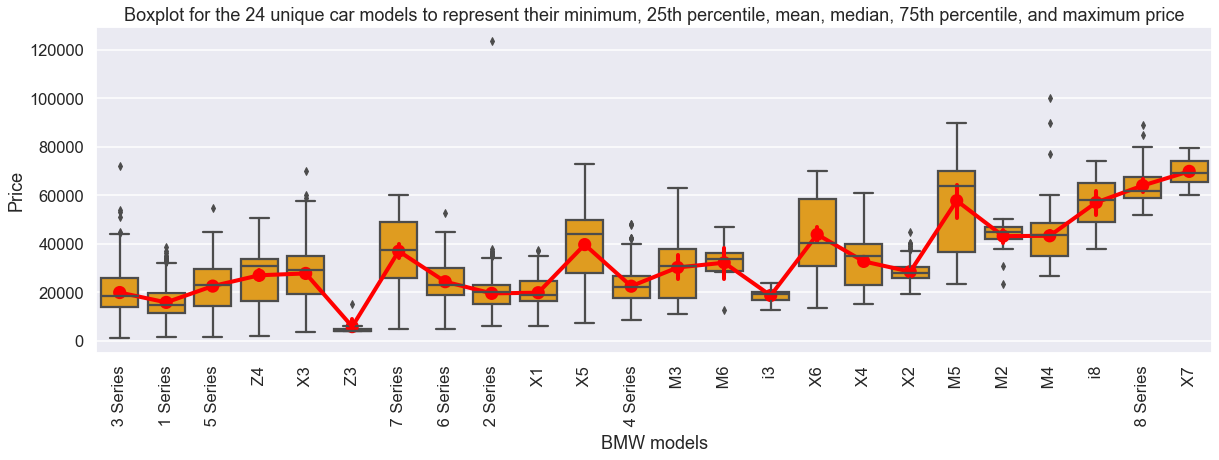

In [18]:
# create a new figure
plt.figure(figsize=(20,6))

# boxplot using seaborn and pandas
# dataset is sorted based on the 'price'
sns.boxplot(x='model', y='price', data=df.sort_values(by='price'), color='orange')
sns.pointplot(x='model', y='price', data=df.sort_values(by='price'), color='red', alpha=0.5)
plt.title("Boxplot for the 24 unique car models to represent their minimum, 25th percentile, mean, median, 75th percentile, and maximum price")
plt.xlabel("BMW models")
plt.ylabel("Price")

# rotate the xticks by 90 degree to avoid overlapping
plt.xticks(rotation=90)
plt.show()

The problem with boxplot is that it doesn't represent the mean and the number of samples (count of each model). The pointplot is representing the mean car price of each model.

- X7 model cars have the highest average price
- 2 series car have an outlier car price of more than \\$120000
- M5 car has the highest interquartile range (difference between the 25th and 75th percentile)

#### Boxplot of car prices from 1996 to 2020

**Assumption: Latest cars are more expensive than the old cars**

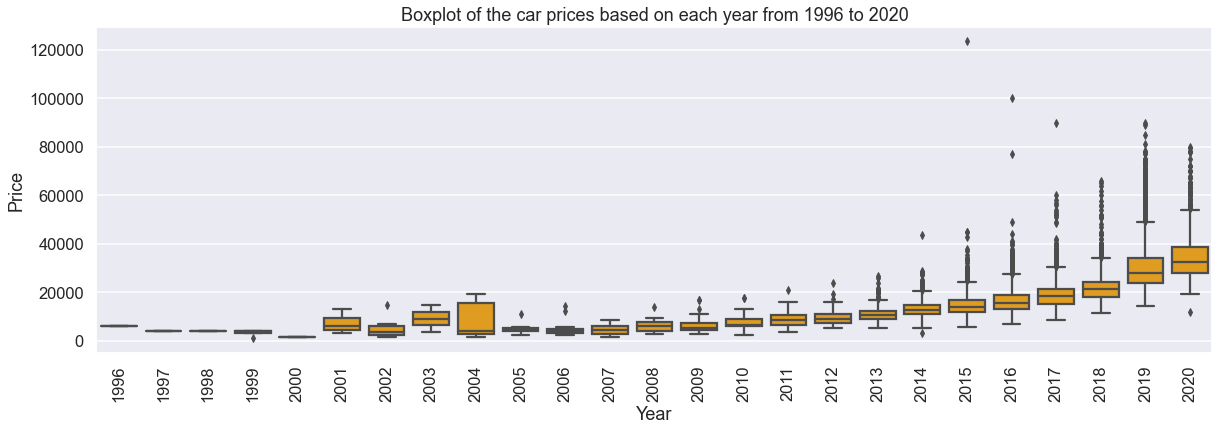

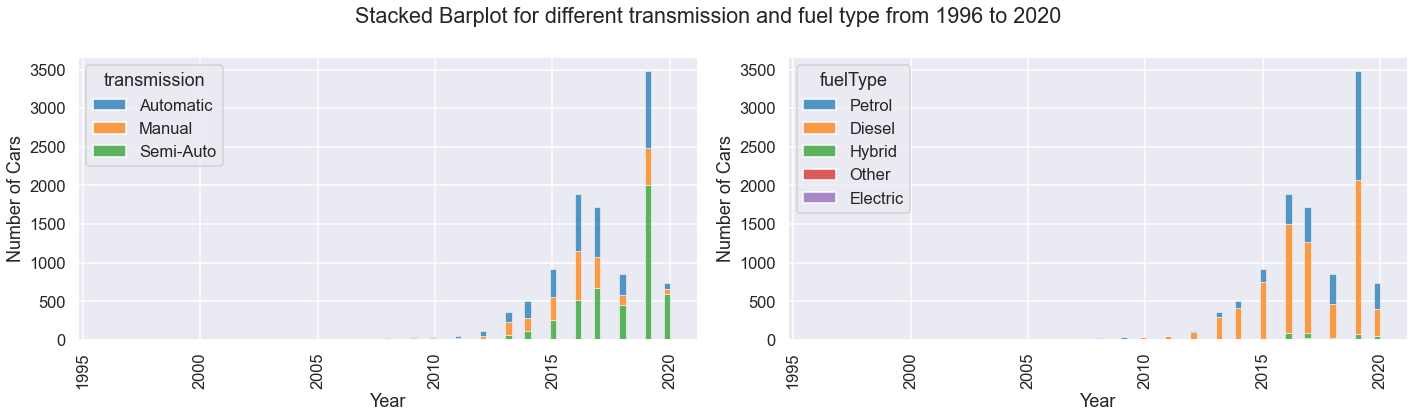

In [19]:
plt.figure(figsize=(20,6))

# dataset is sorted based on the 'year'
sns.boxplot(x='year', y='price', data=df.sort_values(by='year'), color='orange')
plt.title("Boxplot of the car prices based on each year from 1996 to 2020")
plt.xlabel("Year")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

# stacked barplot
def stacked_barplot(hue):
    '''
    Args:
        hue (str): categorical variable
    Returns:
        Stacked barplot
    '''
    sns.histplot(x='year', hue=hue, data=df.sort_values(by='year'), multiple="stack")
    plt.xticks(rotation=90)
    plt.xlabel("Year")
    plt.ylabel("Number of Cars")


plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
stacked_barplot('transmission')

plt.subplot(1,2,2)
stacked_barplot('fuelType')

plt.suptitle("Stacked Barplot for different transmission and fuel type from 1996 to 2020")
plt.tight_layout()
plt.show()

#### Observations:

- In the boxplot, the median car price at 2020 is higher than 
- Based on year, the dataset contains lot of outliers which require further investigation
- Until 2010, the car price was below \\$20,000
- In 2020, used car prices vary from \\$20,000 to \\$80,000
- The dataset contains highest number of car samples from 2019
- Diesel and Petrol are the most dominant fuel type in this dataset

### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType

In [20]:
def barplot_(col):
    '''
    This function finds the percentage of cars, average and total selling price by each category
    Args:
        col (str): categorical feature
    Returns:
        3 images of barplot
    '''
    # group the dataset by col and find the number of cars in each category, 
    # average selling price and total selling price 
    data = df.groupby(col)[['price']].agg(['count', 'mean', 'sum']).round(2)

    # reset the index
    data = data.reset_index()

    # sort the dataframe based on the 'count':number of cars in each category
    data = data.sort_values(by=('price','sum'), ascending=False)

    # convert the total selling price from $ to million $
    data[('price','sum')] = data[('price','sum')]/1000000

    # convert the number of cars to percentage of cars in each category
    data[('price','count')] = data[('price','count')]/100
    # display(data)

    plt.figure(figsize=(20,8))

    plt.subplot(1,3,1)
    sns.barplot(y=col, x=('price','count'), data=data, orient='h', color='blue', alpha=0.75)
    plt.title("Percentage of cars in each " + str(col))
    plt.xlabel("% of cars")
    plt.ylabel(col)

    plt.subplot(1,3,2)
    sns.barplot(y=col, x=('price','mean'), data=data, orient='h', color='green', alpha=0.75)
    plt.title("Average selling price of each car by " + str(col))
    plt.xlabel("Average selling price ($)")
    plt.ylabel("")

    plt.subplot(1,3,3)
    sns.barplot(y=col, x=('price','sum'), data=data, orient='h', color='orange')
    plt.title("Total selling price of each " + str(col))
    plt.xlabel("Total selling price ($ millions)")
    plt.ylabel("")

    plt.tight_layout()
    plt.show()

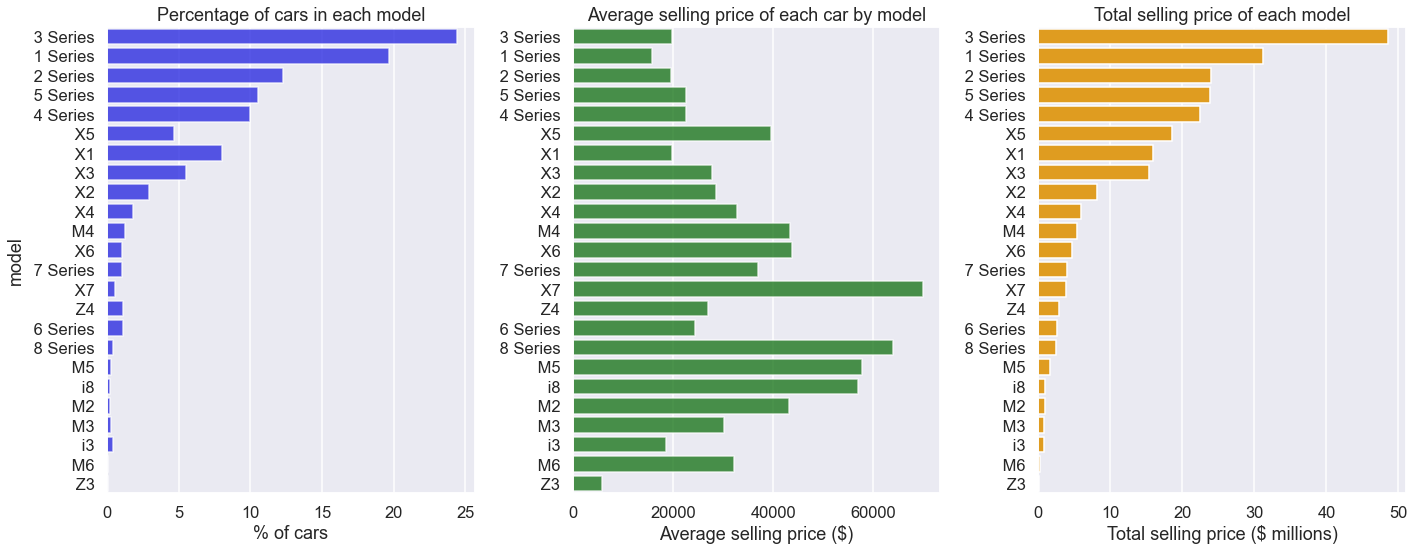

In [21]:
barplot_('model')

- Top 5 selling car models are 3 Series (24.4%), 1 Series (19.7%), 2 Series (12.3%), 5 Series (10.6%) and 4 Series (10%)
- Top 5 average selling price car models are X7 (\\$69,842), 8 Series (\\$63,997), M5 (\\$57,760), i8 (\\$57,012), and X6 (\\$43,838)
- Top 5 total selling price car models are 3 Series (\\$48.6M), 1 Series (\\$31.2M), 2 Series (\\$24M), 5 Series (\\$23.8M) and 4 Series (\\$22.4M)

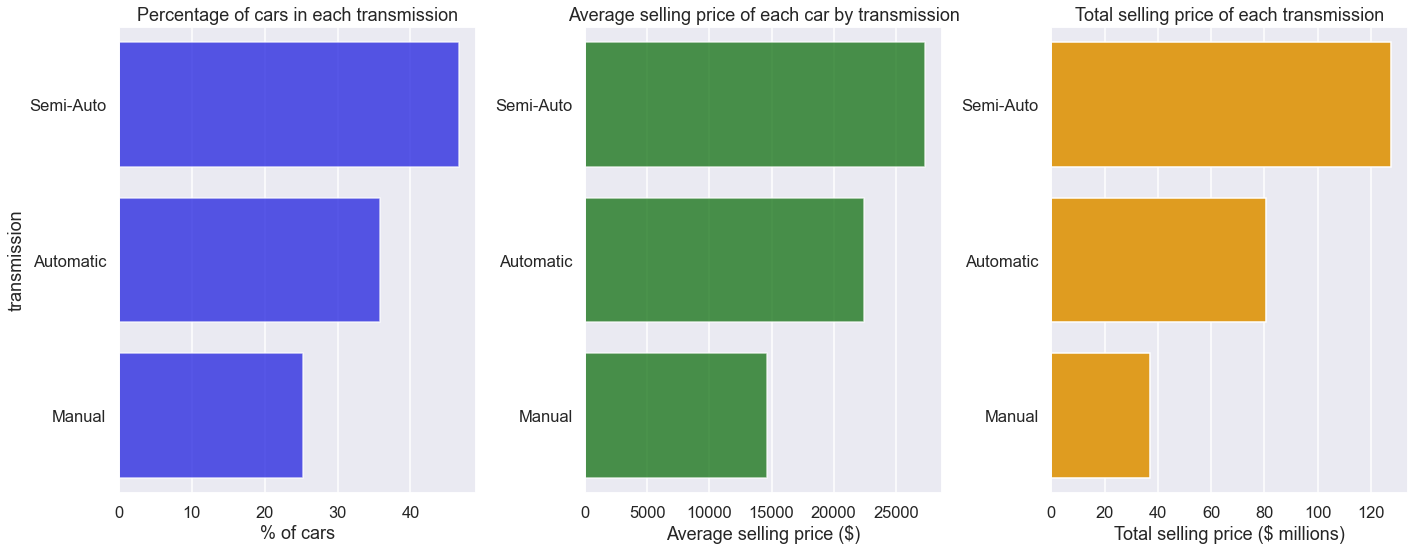

In [22]:
barplot_('transmission')

- From the above barplots, it's clear that the dataset contains most amount of data about the Semi-auto cars (47%)
- Total selling price of Semi-auto cars \\$127.6M, Automatic \\$80.4M, and Manual \\$37M

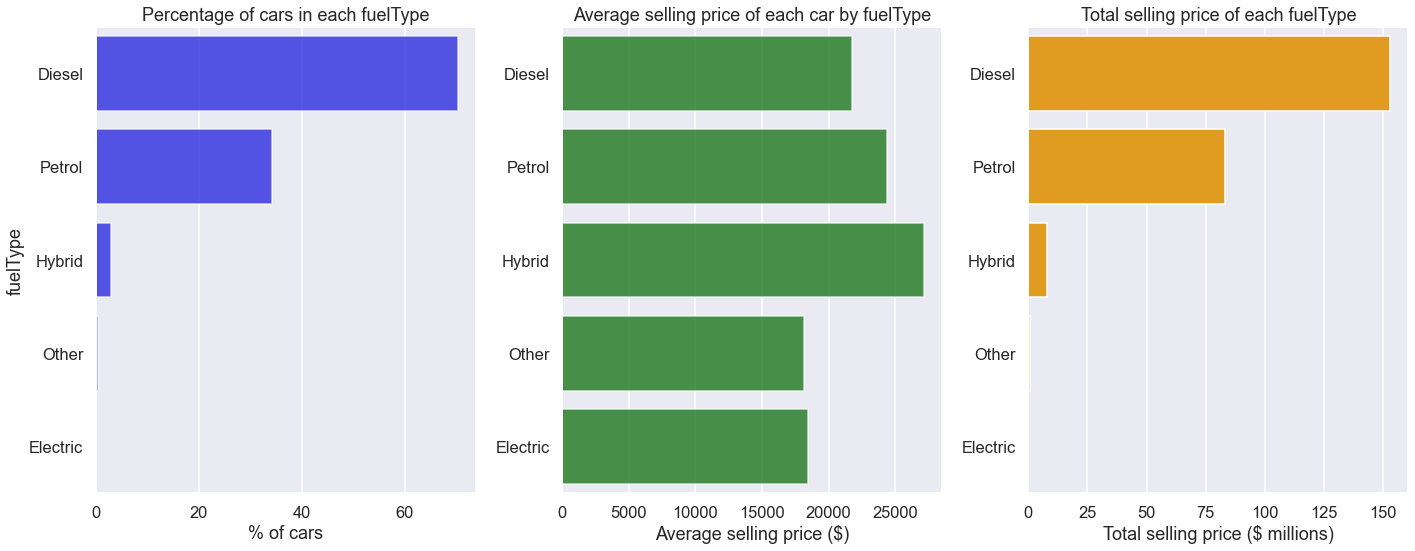

In [23]:
barplot_('fuelType')

- In this datset, most of the BMW cars are Diesel based 70.3% and second highest Petrol 34%
- Average price of a Hybrid car is greater than other fuel types
- Total selling price of cars by fuelType: Diesel based cars \\$153M, and Petrol based cars \\$83M

In [24]:
# separate the numeric columns
numeric_cols = df.select_dtypes(include='number').columns
display(numeric_cols)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

#### Distribution of the features and target variable for different transmission and fuel type

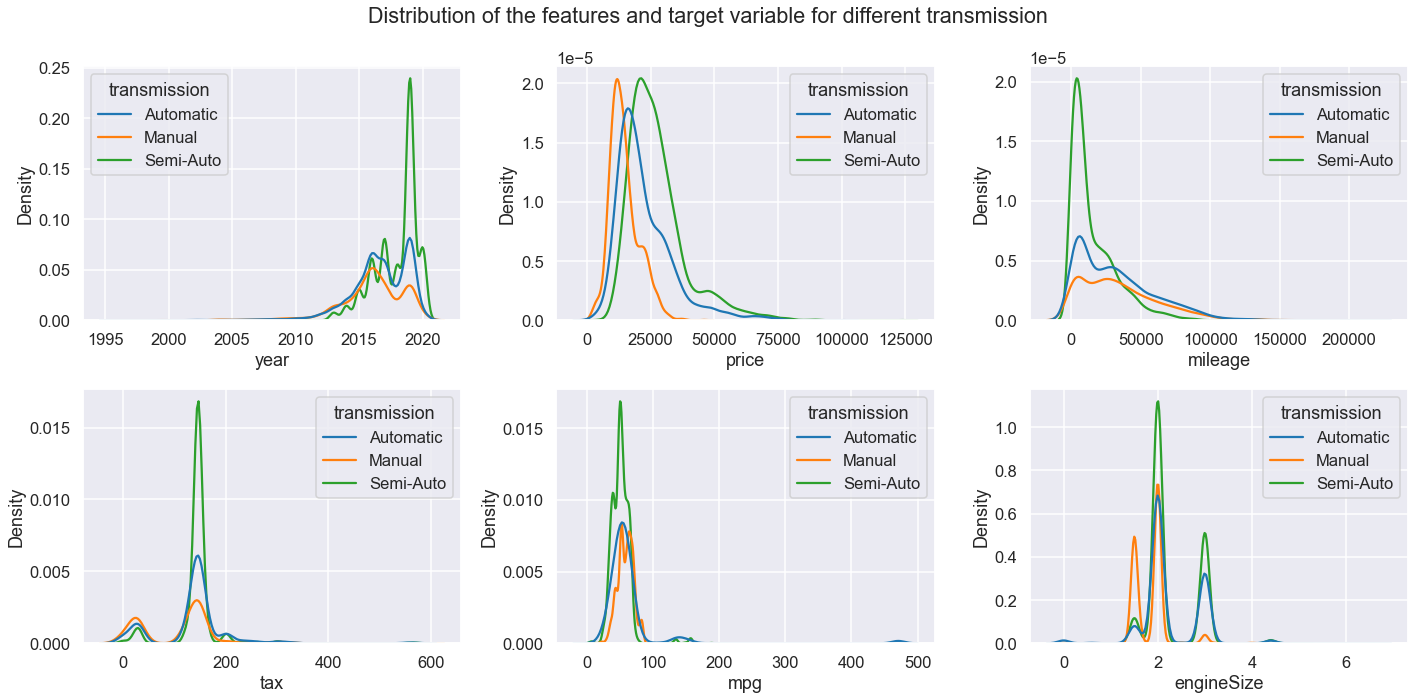

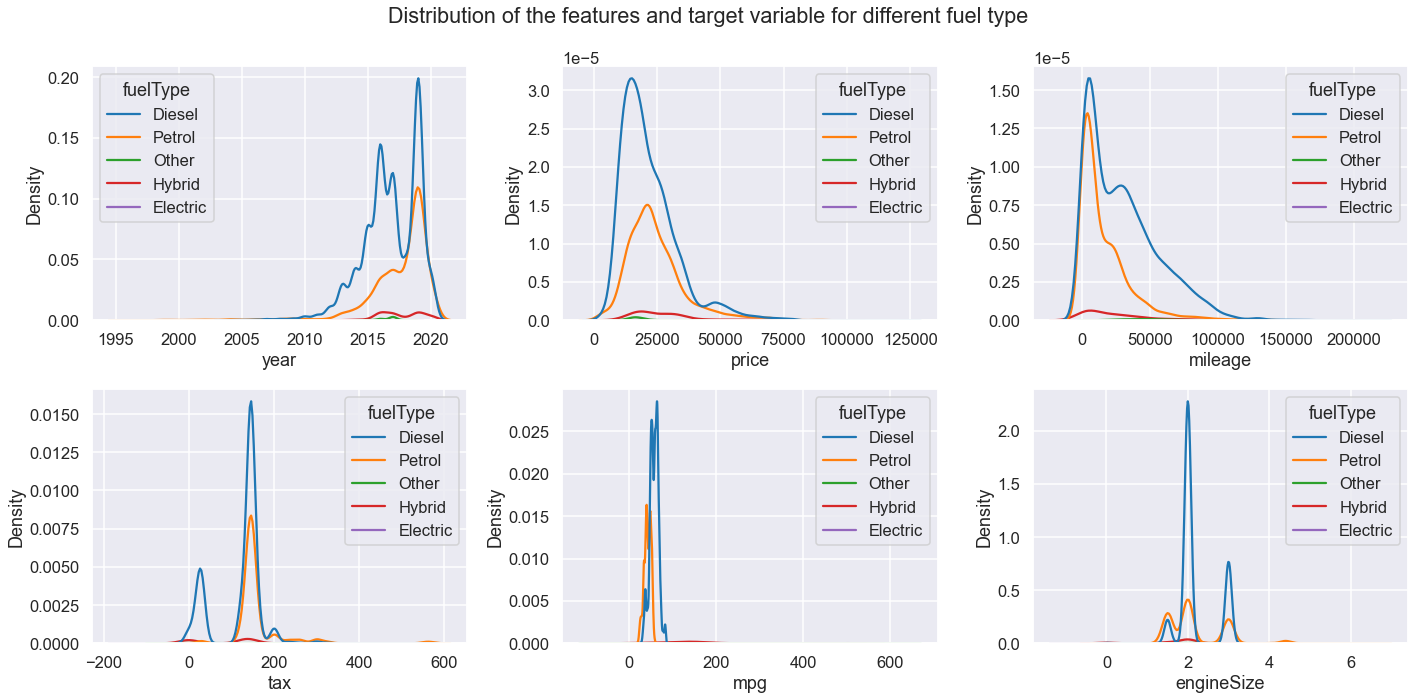

In [25]:
plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.kdeplot(x=numeric_cols[col], data=df, hue='transmission', common_norm=True)

plt.suptitle("Distribution of the features and target variable for different transmission")
plt.tight_layout()
plt.show()

plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.kdeplot(x=numeric_cols[col], data=df, hue='fuelType', common_norm=True)

plt.suptitle("Distribution of the features and target variable for different fuel type")
plt.tight_layout()
plt.show()

#### Assumption: 
- **The features are normally distributed and Linear Regression will perform best to predict the selling price**

From the above distribution plots, it's clear that the given features are not normally distributed. Few features also contain outliers. So I need perform data transformation before applying linear models or I can apply ensemble learning, where normally distributed features are not mandatory.

#### ECDF of the features and target variable

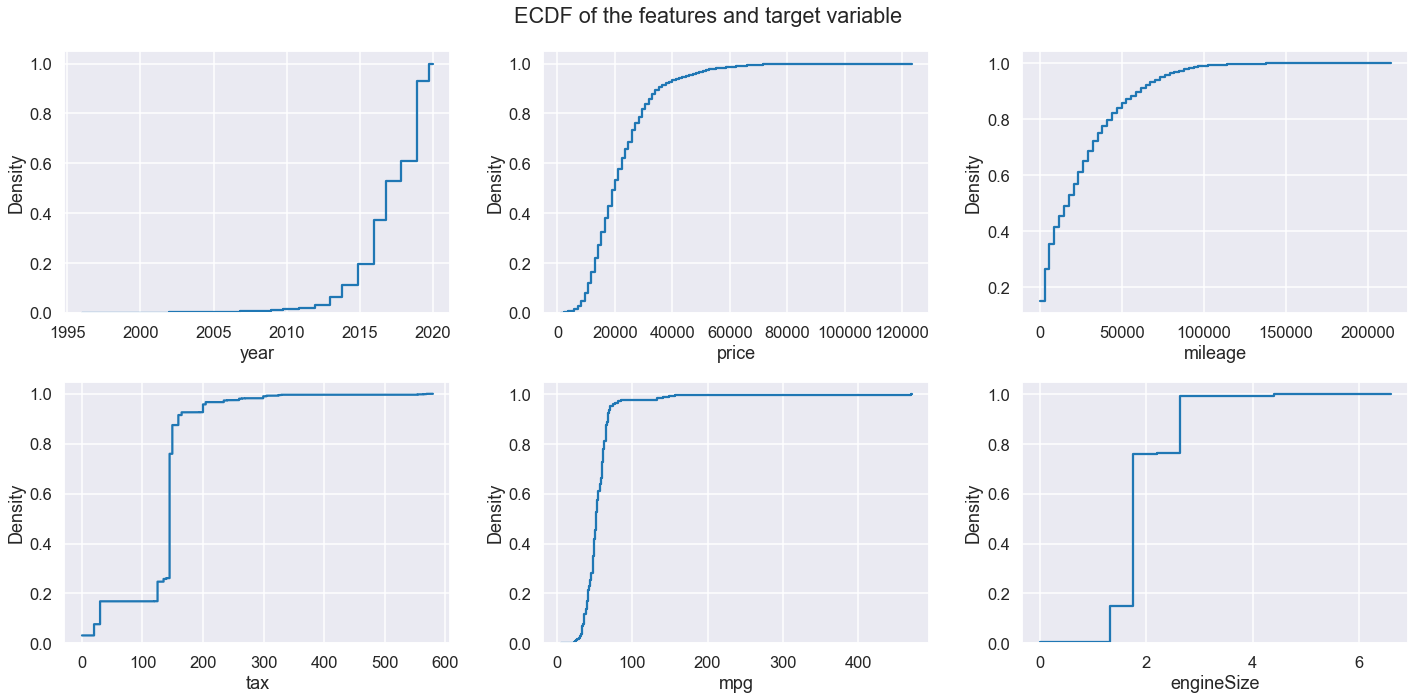

In [26]:
plt.figure(figsize=(20,10))

for col in range(len(numeric_cols)):
    plt.subplot(2,3,col+1)
    sns.histplot(x=numeric_cols[col], data=df, stat="density", cumulative=True, fill=False, element="step")

plt.suptitle("ECDF of the features and target variable")
plt.tight_layout()
plt.show()

- 50% of the cars have price less or than equal \\$20,000
- 90% of the cars have price less or than equal \\$30,000
- 82% of the cars have mileage less or than equal 50,000. That means they are in quite good condition!
- nearly 98% of the cars have tax less than or equal to \\$200. Very few cars have tax greater than \\$200
- nearly 99% of the cars have mpg less than or equal to 100

#### Scatterplot and residualplot of the features and target variable 'price'

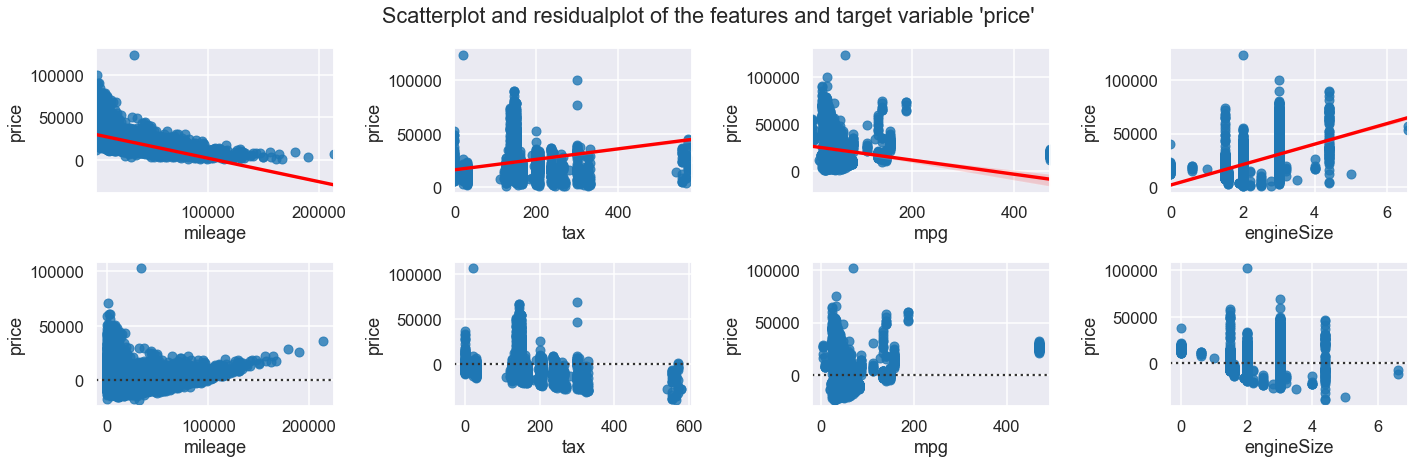

In [27]:
numeric_features = ['mileage', 'tax', 'mpg', 'engineSize']

target = 'price'

plt.figure(figsize=(20,12))
for i in range(len(numeric_features)):
    
    plt.subplot(4,4,i+1)
    sns.regplot(x=numeric_features[i], y=target, data=df, line_kws={"color": "red"})
    
    plt.subplot(4,4,i+5)
    sns.residplot(x=numeric_features[i], y=target, data=df)
    
plt.suptitle("Scatterplot and residualplot of the features and target variable 'price'")
plt.tight_layout()
plt.show()

**Can we fit each individual feature with the target variable 'price'?**

If we try to fit the each feature with the target variable 'price', we can see that, we can't define them in linear regression: can't fit the feature and target in a straight line (first row). Also, residuals (second row) are quite high.

#### Outlier removal

In [28]:
df = df[df['mpg'] <= 150]

'mpg' columns contain outliers because mpg for the bmw cars can't be more than 125
<br>Assumption: **'mpg' > 150 are outliers**

Number of rows after outlier removal  = 10686
<br>Number of rows before outlier removal = 10781

So, number of rows removed = 10781 - 10686 = 95

### Feature Enginerring

In [29]:
# create a new categorial feature 'Engine_Size' 
# engineSize 0L to 1L: small
# engineSize 1L to 2L: medium
# engineSize 2L to 3L: large
# engineSize 3L to 7L: Extra_Large
df['Engine_Size'] = pd.cut(df['engineSize'], 
                           bins=[-1,1,2,3,8], 
                           labels=["small", "medium", "large", "Extra_Large"])

# create a new categorial feature 'road_tax_range'
# road_tax_range $0 to $150: below_150
# road_tax_range $150 to $300: 150_300
# road_tax_range $300 to $450: 300_450
# road_tax_range $450 to $600: 450_600
df['road_tax_range'] = pd.cut(df['tax'], 
                              bins=[-1, 150, 300, 450, 600], 
                              labels=["below_150", "150_300", "300_450", "450_600"])

# create a new categorial feature 'mileage_range' 
# mileage_range 0 miles to 50000 miles : Excellent
# mileage_range 50000 miles to 100000 miles : Good
# mileage_range 100000 miles to 150000 miles : Medium
# mileage_range 150000 miles to 214000 miles : Bad
df['mileage_range'] = pd.cut(df['mileage'],
                             bins=[-1, 50000, 100000, 150000, 214000], 
                             labels=["Excellent", "Good", "Medium", "Bad"])

df['year'] = df['year'].astype('int')

# create a new feature 'car_age'
df ['car_age'] = 2021 - df['year']

# create a new categorial feature 'car_age_range' 
# car_age_range 0 to 5 years : <=5
# car_age_range 5 to 10 years : 5<age<=10
# car_age_range 10 to 15 years : 10<age<=15
# car_age_range 15 to 20 years : 15<age<=20
# car_age_range 20 to 25 years : 20<age<=25
df['car_age_range'] = pd.cut(df['car_age'],
                             bins=[-1, 5, 10, 15, 20, 25],
                             labels=["below_5", "between_5_to_10", "between_10_to_15", "between_15_to_20", "greater_than_20"])

df = df.drop('car_age', axis=1)

#### Scatterplot of the feature vs target variable based on 'transmission'

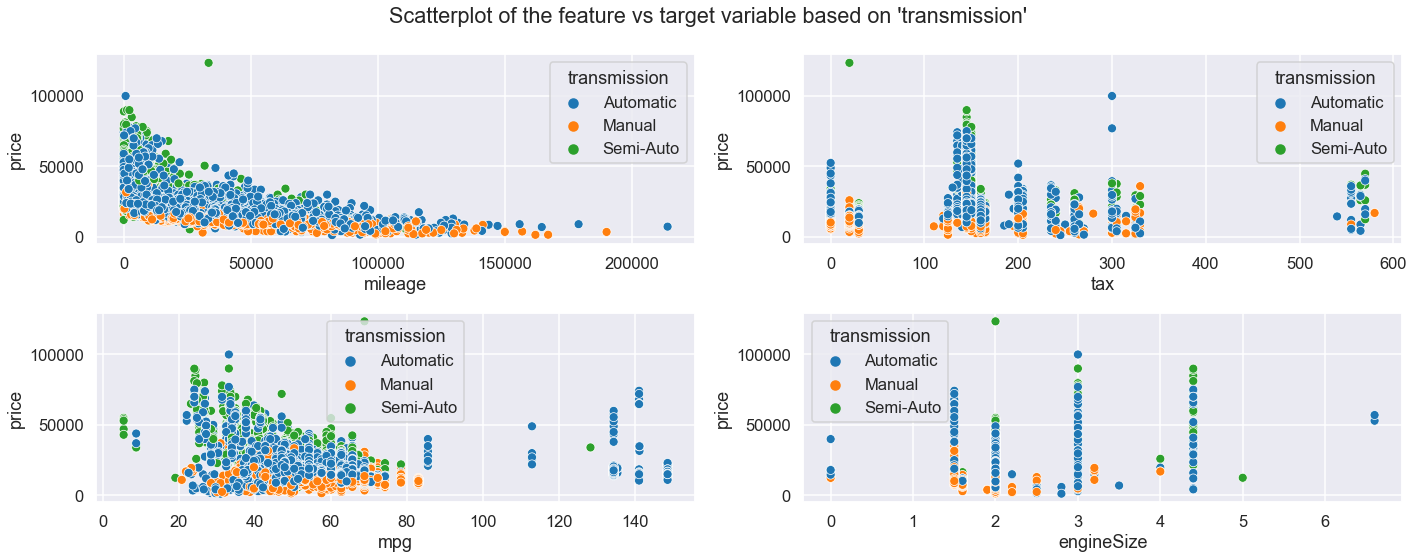

In [30]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='transmission')

plt.suptitle("Scatterplot of the feature vs target variable based on 'transmission'")
plt.tight_layout()   
plt.show()

- Road tax and engineSize variables don't look like numerical features. They seem categorical features.
- Manual transmission cars are cheap, semi-auto cars are the most expensive
- Manual transmission cars have lower mpg
- As the mileage increases, prices are decreasing. But for other features (tax, mpg, engineSize), the relationship with the price is non-linear

#### Scatterplot of the feature vs target variable based on 'mileage_range'

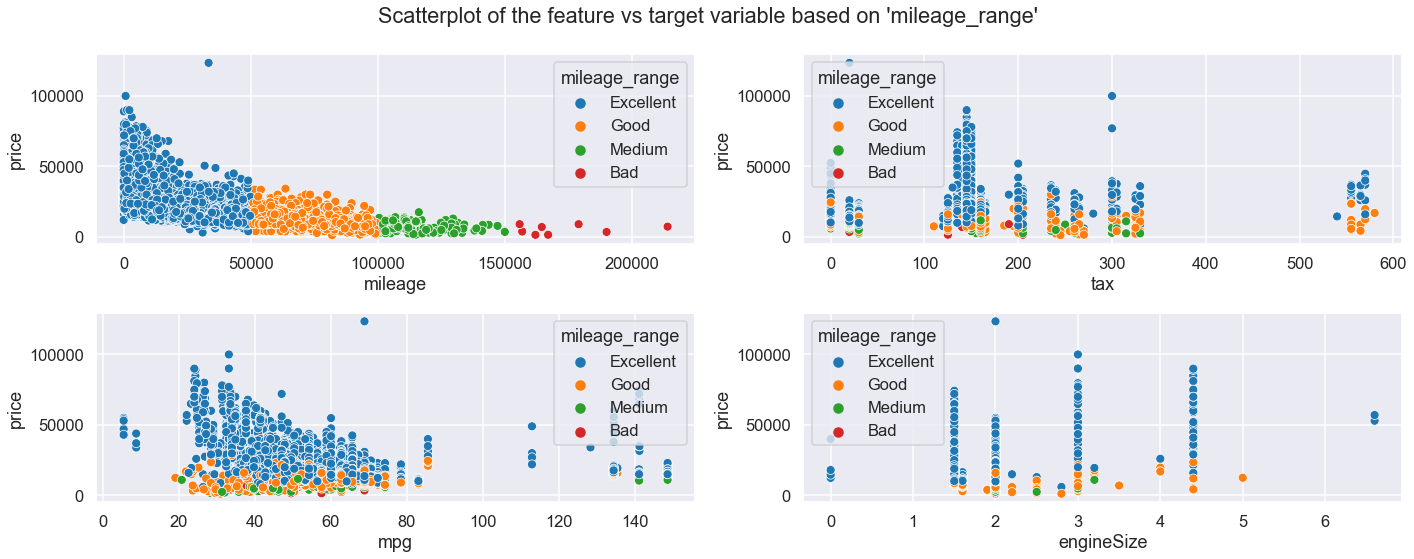

In [31]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='mileage_range')

plt.suptitle("Scatterplot of the feature vs target variable based on 'mileage_range'")
plt.tight_layout()   
plt.show()

- Excellent (lower mileage) condition cars have the best selling value
- mileage_range no specific relation with road tax, mpg, and engineSize

### Scatterplot of the feature vs target variable based on 'road_tax_range'

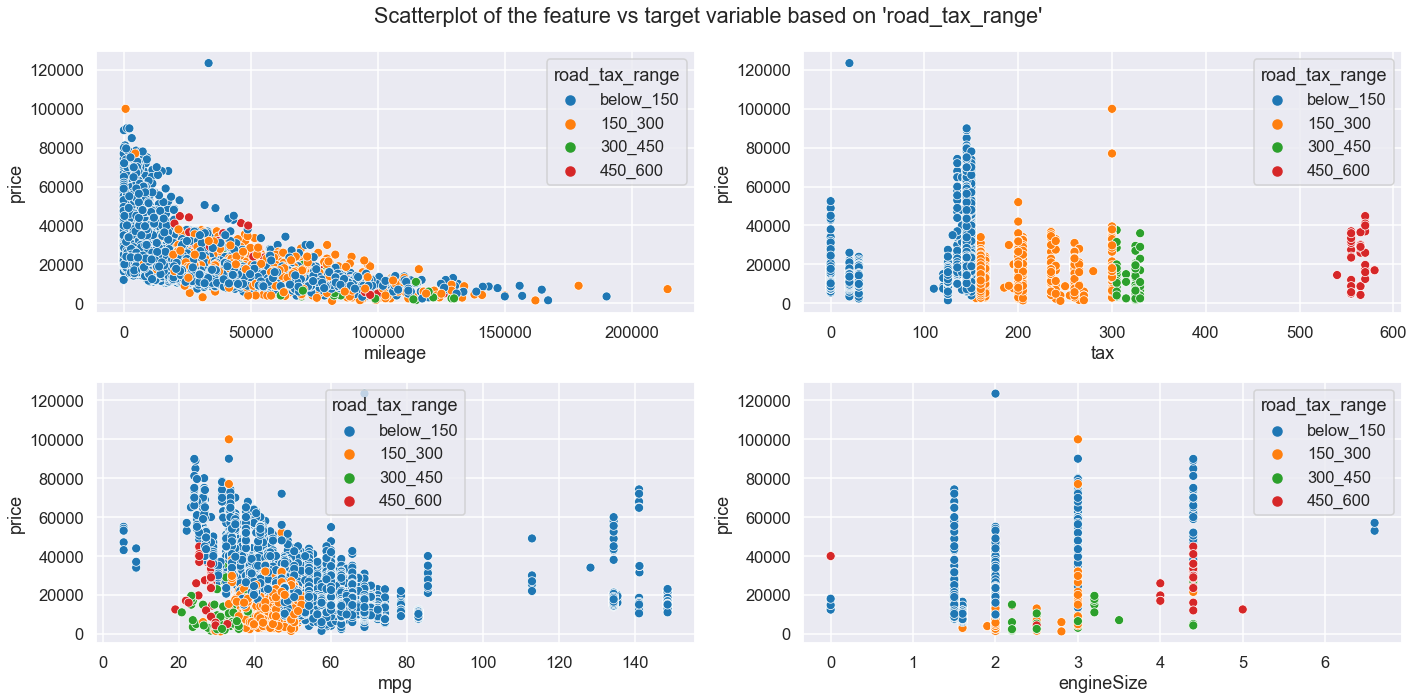

In [32]:
plt.figure(figsize=(20,10))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='road_tax_range')

plt.suptitle("Scatterplot of the feature vs target variable based on 'road_tax_range'")
plt.tight_layout()   
plt.show()

- Largest number of cars have tax below \\$150
- I was curious if there's any relation between the engineSize and tax, seems None. We'll look for it from a different angle.

### Scatterplot of the feature vs target variable based on 'Engine_Size'

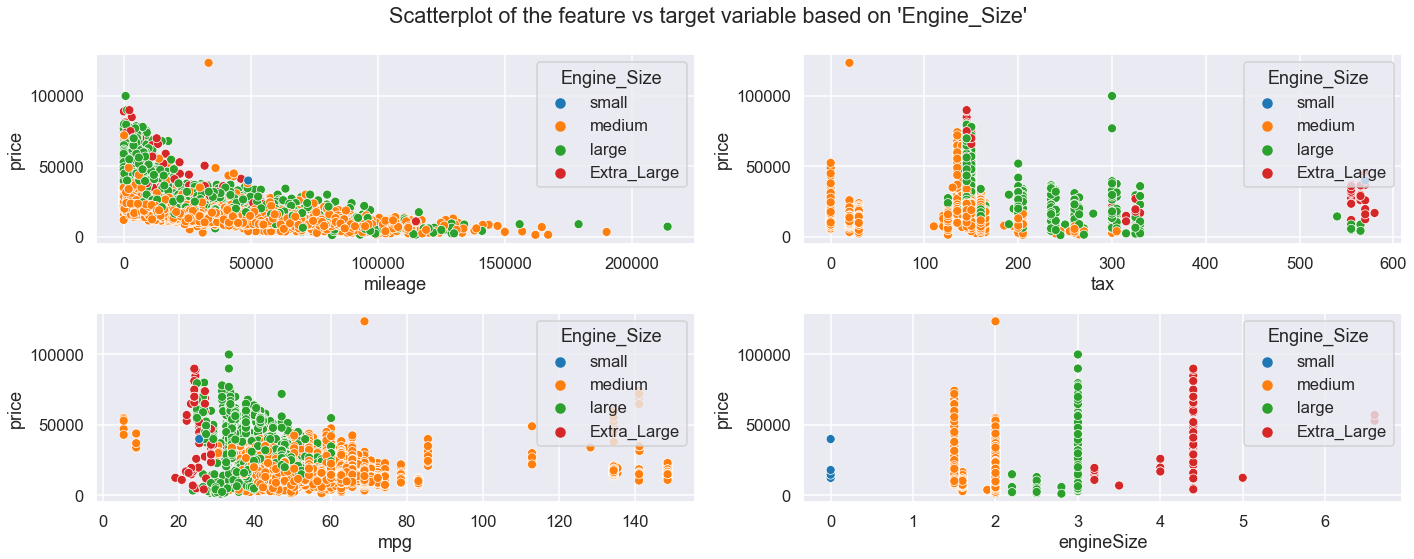

In [33]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='Engine_Size')

plt.suptitle("Scatterplot of the feature vs target variable based on 'Engine_Size'")
plt.tight_layout()   
plt.show()

- medium Engine_Size cars are less expensive and lower tax
- Finally, we can see that, if the Engine_Size increases, the tax is also increasing
- Engine_Size and mpg have a negative correlation. If the Engine_Size increases, the mpg is decreasing

#### Scatterplot of the feature vs target variable based on 'fuelType'

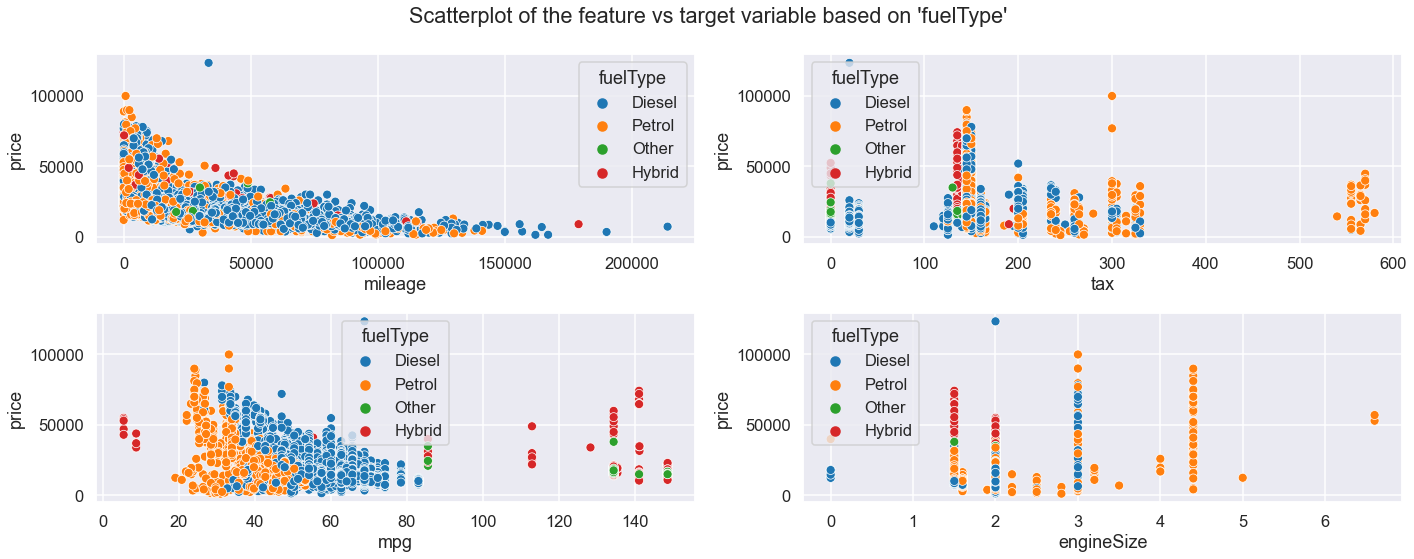

In [34]:
plt.figure(figsize=(20,8))
for i in range(len(numeric_features)):
    
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=numeric_features[i], y=target, data=df, hue='fuelType')

plt.suptitle("Scatterplot of the feature vs target variable based on 'fuelType'")
plt.tight_layout()   
plt.show()

- Diesel and Petrol based cars the popular choices
- Petrol based cars have higher road tax, lower mpg and larger engineSize
- Hybrid cars have higher mpg

### Boxenplots along with the pointplot for different categorical features

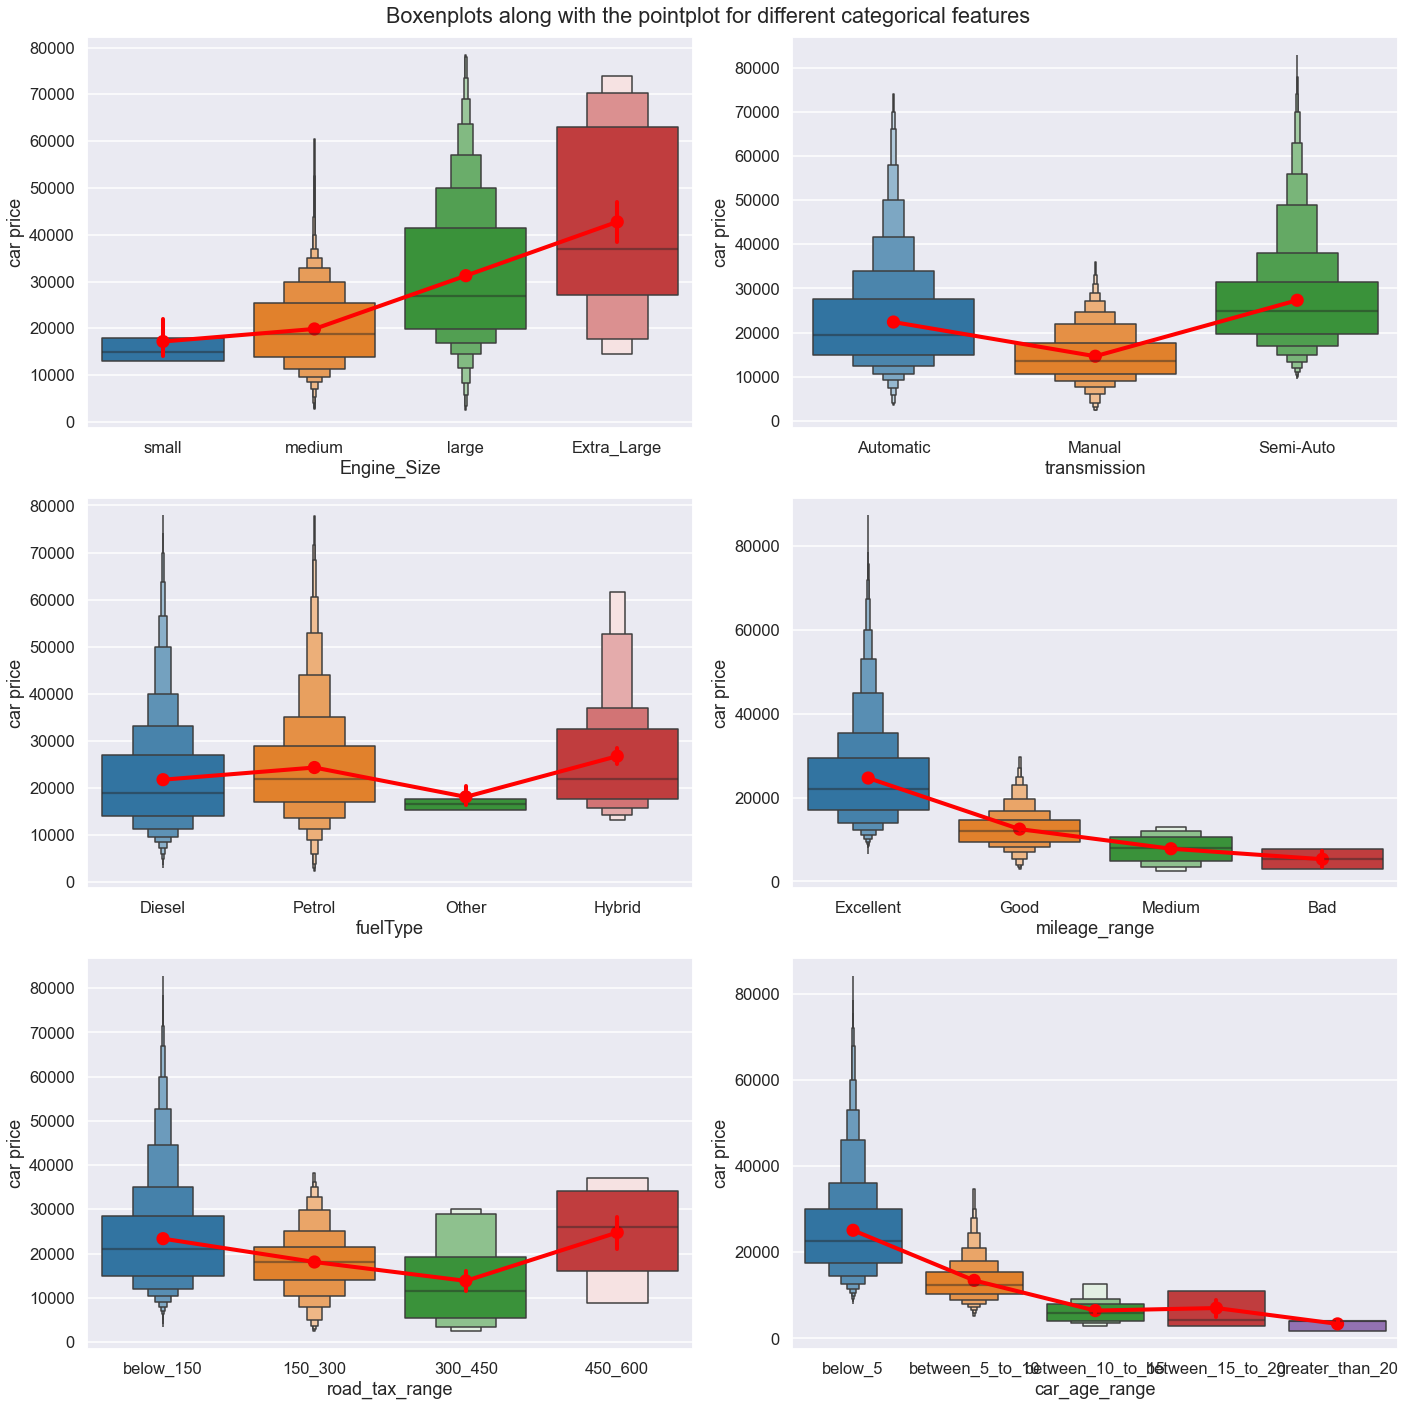

In [35]:
cal_cols = ['Engine_Size', 'transmission', 'fuelType', 'mileage_range', 'road_tax_range', 'car_age_range']

plt.figure(figsize=(20,20))

for col in range(len(cal_cols)):
    plt.subplot(3,2,col+1)
    sns.boxenplot(x=cal_cols[col], y='price', data=df, showfliers=False)
    sns.pointplot(x=cal_cols[col], y='price', data=df, color='red')
    plt.ylabel("car price")

plt.suptitle("Boxenplots along with the pointplot for different categorical features")
plt.tight_layout()
plt.show()

Boxenplot has all the statistical features of boxplot. In addition, it helps to understand the quantiles better.
- Manual transmission cars have low selling price and least popular. Automatic and semi-auto transmission cars prices vary to very cheap to expensive
- Diesel, Petrol and Hybrid cars are popular choices

Characateristics of the most expensive cars:
- Extra large engine size 
- Semi-auto transmission
- Hybrid 
- Excellent mileage range
- Most recent years model

In [36]:
def correlation_heatmap(df):
    """
    Creates a heatmap of the Pearson correlation coefficients
    Args:
        df (dataframe): correlation among the variables
    Returns:
        heatmap
    """
    
    # find the Pearson correlation coefficients
    correlation_matrix = df.corr()

    # create a mask of lower triangular matrix
    mask = np.zeros_like(correlation_matrix)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (10,10))

    # create a heatmap of the correlation coefficients
    sns.heatmap(correlation_matrix, linewidths=0.2, 
                vmax=1.0, vmin=-1., 
                square=True, cmap='RdYlGn', 
                linecolor='white', annot=True, mask = mask) 
    
    plt.title('Heatmap of the Pearson Correlation Coefficients')

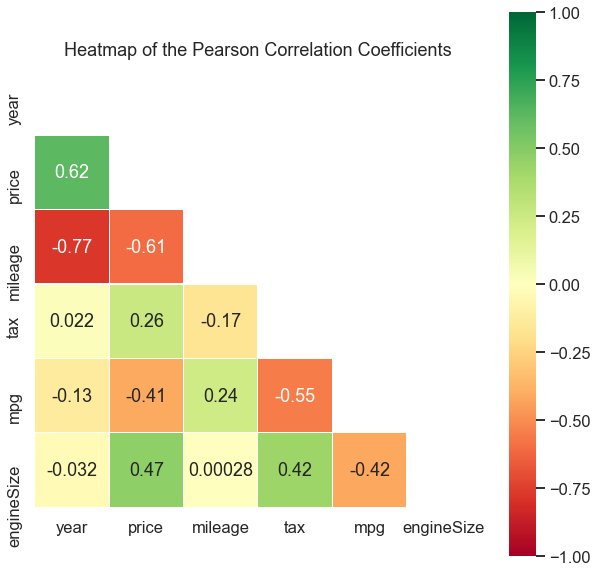

In [37]:
# set the background of the images
sns.set_style('whitegrid')

correlation_heatmap(df[numeric_cols])

- The price increases when engineSize increases
- Car price has a negative correlation with the mpg. That's quite opposite what we think- A good car should have high mpg
- If the mileage increases, the car price drops
- Road tax has a positive correlation with the engineSize
- As the engineSize increases, the mpg decreases
- Car price has a very positive correlation with the year


In [38]:
display(df.head())
display(df.tail())

model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize Engine_Size road_tax_range mileage_range    car_age_range  
0         2.0      medium      below_150          Good  between_5_to_10  
1         2.0      medium      below_150     Excellent          below_5  
2         3.0       large        150_300          Good          below_5  
3         1.5      medium      below_150     Excellent          below_5  
4         3.0       large        150_300     Excellent  between_5_to_10

model  year  price transmission  mileage fuelType  tax   mpg  \
10776         X3  2016  19000    Automatic    40818   Diesel  150  54.3   
10777   5 Series  2016  14600    Automatic    42947   Diesel  125  60.1   
10778   3 Series  2017  13100       Manual    25468   Petrol  200  42.8   
10779   1 Series  2014   9930    Automatic    45000   Diesel   30  64.2   
10780         X1  2017  15981    Automatic    59432   Diesel  125  57.6   

       engineSize Engine_Size road_tax_range mileage_range    car_age_range  
10776         2.0      medium      below_150     Excellent          below_5  
10777         2.0      medium      below_150     Excellent          below_5  
10778         2.0      medium        150_300     Excellent          below_5  
10779         2.0      medium      below_150     Excellent  between_5_to_10  
10780         2.0      medium      below_150          Good          below_5

In [39]:
df.info()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10686 entries, 0 to 10780
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   model           10686 non-null  object  
 1   year            10686 non-null  int32   
 2   price           10686 non-null  int64   
 3   transmission    10686 non-null  object  
 4   mileage         10686 non-null  int64   
 5   fuelType        10686 non-null  object  
 6   tax             10686 non-null  int64   
 7   mpg             10686 non-null  float64 
 8   engineSize      10686 non-null  float64 
 9   Engine_Size     10686 non-null  category
 10  road_tax_range  10686 non-null  category
 11  mileage_range   10686 non-null  category
 12  car_age_range   10686 non-null  category
dtypes: category(4), float64(2), int32(1), int64(3), object(3)
memory usage: 1.1+ MB


year          price        mileage           tax           mpg  \
count  10686.000000   10686.000000   10686.000000  10686.000000  10686.000000   
mean    2017.074396   22695.052311   25550.388171    132.056429     54.227756   
std        2.354972   11403.223311   25197.858356     61.372681     15.567906   
min     1996.000000    1200.000000       1.000000      0.000000      5.500000   
25%     2016.000000   14898.250000    5524.250000    135.000000     45.600000   
50%     2017.000000   20440.000000   18379.500000    145.000000     52.300000   
75%     2019.000000   27890.000000   38354.500000    145.000000     62.800000   
max     2020.000000  123456.000000  214000.000000    580.000000    148.700000   

         engineSize  
count  10686.000000  
mean       2.176352  
std        0.538350  
min        0.000000  
25%        2.000000  
50%        2.000000  
75%        2.000000  
max        6.600000

There are 12 features.
<br>Among them, there are 5 numerical features 'year', 'mileage', 'tax', 'mpg', 'engineSize'

In [40]:
# df.to_csv("bmw_used_cars.csv", index=False)

Now, the dataset contains originals variables + additional engineered variables


In [41]:
# separate the training features
train = df.drop(['price'], axis=1)

# seprate the target variable
target = df[['price']]

#### Data Transformation

In [42]:
# numeric features
numeric_cols = train.select_dtypes(include='number').columns
print(numeric_cols)

Index(['year', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')


We already know that, our features are not normally distributed. A power transform will make the probability distribution of a variable more Gaussian. This is often described as removing a skew in the distribution, although more generally is described as  stabilizing the variance of the distribution.

references: 
<br>[1] https://machinelearningmastery.com/power-transforms-with-scikit-learn/
<br>[2] https://medium.com/@josecacho/how-to-use-powertransformer-to-improve-model-performance-e62357fb4df8

In [43]:
scale = PowerTransformer()

# using a loop to standardize only the numeric columns
for col in numeric_cols:
    train[col] = scale.fit_transform(train[[col]])

display(train.head())
display(train.describe())

model      year transmission   mileage fuelType       tax       mpg  \
0   5 Series -1.342833    Automatic  1.376034   Diesel -0.076490  0.346900   
1   6 Series  0.387343    Automatic -0.083649   Petrol  0.241080 -0.758725   
2   5 Series -0.497436    Automatic  1.295717   Diesel  0.475549 -0.081679   
3   1 Series -0.060080    Automatic  0.398395   Diesel  0.241080  1.224749   
4   7 Series -1.342833    Automatic  0.779354   Diesel  0.475549 -0.155037   

   engineSize Engine_Size road_tax_range mileage_range    car_age_range  
0   -0.248848      medium      below_150          Good  between_5_to_10  
1   -0.248848      medium      below_150     Excellent          below_5  
2    1.483336       large        150_300          Good          below_5  
3   -1.425559      medium      below_150     Excellent          below_5  
4    1.483336       large        150_300     Excellent  between_5_to_10

year       mileage           tax           mpg    engineSize
count  1.068600e+04  1.068600e+04  1.068600e+04  1.068600e+04  1.068600e+04
mean   1.106441e-15 -2.553326e-16  7.234424e-16  2.127772e-16 -2.446937e-15
std    1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00  1.000047e+00
min   -7.439609e+00 -2.180937e+00 -2.361598e+00 -7.253610e+00 -8.404737e+00
25%   -4.974362e-01 -7.073048e-01  8.304880e-02 -5.260838e-01 -2.488478e-01
50%   -6.007966e-02  8.170000e-02  2.410798e-01 -1.672441e-02 -2.488478e-01
75%    8.450578e-01  7.477188e-01  2.410798e-01  6.759834e-01 -2.488478e-01
max    1.313297e+00  3.126329e+00  6.385304e+00  4.138298e+00  4.855079e+00

#### Distribution of the numerical features after power transformation

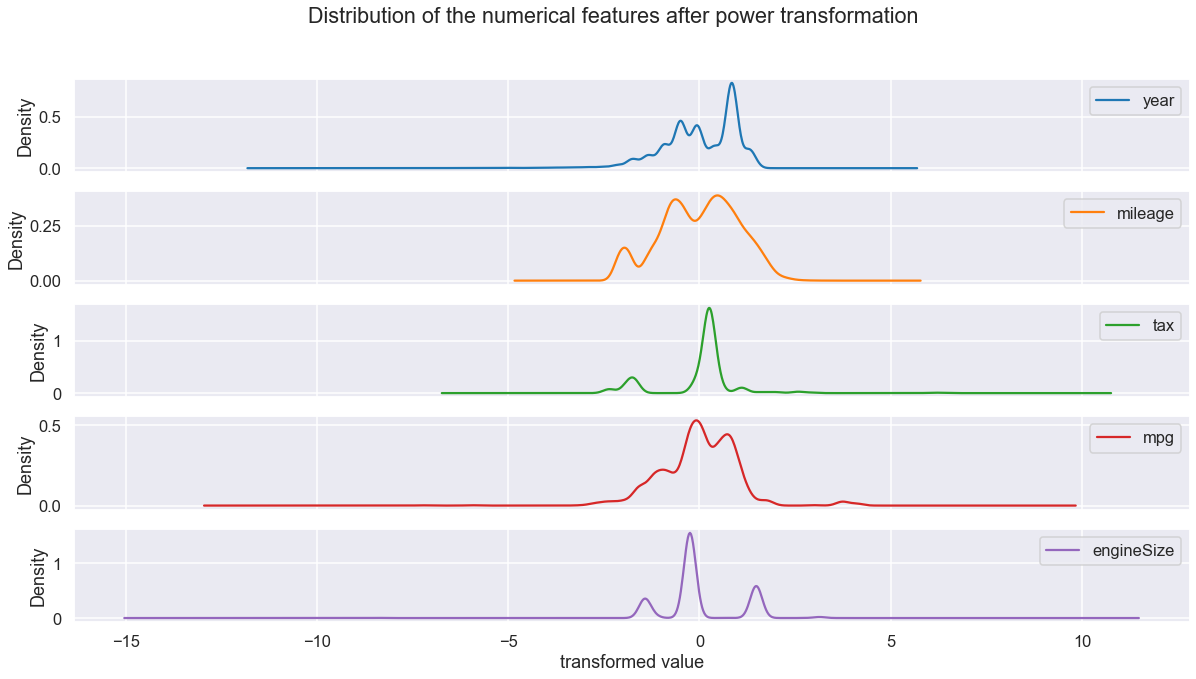

In [44]:
# set the background of the images
sns.set_style('darkgrid')

train[numeric_cols].plot(kind='kde', subplots=True, figsize=(20,10), 
                         title="Distribution of the numerical features after power transformation")
plt.xlabel("transformed value")
plt.show()

In [45]:
#### one-hot encoding

In [46]:
# one-hot encoding
train = pd.get_dummies(train)

# Let's check the data
display(train.head())
display(train.info())

year   mileage       tax       mpg  engineSize  model_ 1 Series  \
0 -1.342833  1.376034 -0.076490  0.346900   -0.248848                0   
1  0.387343 -0.083649  0.241080 -0.758725   -0.248848                0   
2 -0.497436  1.295717  0.475549 -0.081679    1.483336                0   
3 -0.060080  0.398395  0.241080  1.224749   -1.425559                1   
4 -1.342833  0.779354  0.475549 -0.155037    1.483336                0   

   model_ 2 Series  model_ 3 Series  model_ 4 Series  model_ 5 Series  ...  \
0                0                0                0                1  ...   
1                0                0                0                0  ...   
2                0                0                0                1  ...   
3                0                0                0                0  ...   
4                0                0                0                0  ...   

   road_tax_range_450_600  mileage_range_Excellent  mileage_range_Good  \
0                       0                        0                   1   
1                       0                        1                   0   
2                       0                        0                   1   
3                       0                        1                   0   
4                       0                        1                   0   

   mileage_range_Medium  mileage_range_Bad  car_age_range_below_5  \
0                     0                  0                      0   
1                     0                  0                      1   
2                     0                  0                      1   
3                     0                  0                      1   
4                     0                  0                      0   

   car_age_range_between_5_to_10  car_age_range_between_10_to_15  \
0                              1                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              1                               0   

   car_age_range_between_15_to_20  car_age_range_greater_than_20  
0                               0                              0  
1                               0                              0  
2                               0                              0  
3                               0                              0  
4                               0                              0  

[5 rows x 52 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10686 entries, 0 to 10780
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            10686 non-null  float64
 1   mileage                         10686 non-null  float64
 2   tax                             10686 non-null  float64
 3   mpg                             10686 non-null  float64
 4   engineSize                      10686 non-null  float64
 5   model_ 1 Series                 10686 non-null  uint8  
 6   model_ 2 Series                 10686 non-null  uint8  
 7   model_ 3 Series                 10686 non-null  uint8  
 8   model_ 4 Series                 10686 non-null  uint8  
 9   model_ 5 Series                 10686 non-null  uint8  
 10  model_ 6 Series                 10686 non-null  uint8  
 11  model_ 7 Series                 10686 non-null  uint8  
 12  model_ 8 Series                 

None

Before one-hot encoding, there were 12 features. 
<br>After one-hot encoding, there are 53 features.

### Feature Selection

Removing the features which have very low variance. Low variance features are considered insignificant for the prediction

In [47]:
def variance_threshold_selector(data, threshold):
    """
    This function removes the features with a variance lower than the threshold
    Args:
        data (dataFrame): pandas DataFrame
        threshold (float): Features with variance lower than this threshold will be removed
    Returns:
        a dataFrame with the actual index and column names
    """
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    
    return data[data.columns[selector.get_support(indices=True)]]

In [48]:
# number of features in the training set
n_features = train.shape[1]

# apply the variance threshold
train = variance_threshold_selector(train, 0.002)

# display(train.head())
# display(train.info())

print("Actual number of features in the dataset = ", n_features)

# after removing the features with lower variance
n_features_var_threshold = train.shape[1]
print("Number of remaining features in the dataset = ", n_features_var_threshold)

# percentage of reduction in features
p_reduced_features = int((n_features - n_features_var_threshold)*100/n_features)
print("Number of features reduced = ", n_features - n_features_var_threshold)
print("Percentage of total features reduced = ", p_reduced_features, "%")

Actual number of features in the dataset =  52
Number of remaining features in the dataset =  45
Number of features reduced =  7
Percentage of total features reduced =  13 %


#### Splitting the data for training and testing

In [49]:
# training size = 80%, test size = 20%
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.2, random_state=42)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test :', X_test.shape)
print('y_test :', y_test.shape)

X_train : (8548, 45)
y_train : (8548, 1)
X_test : (2138, 45)
y_test : (2138, 1)


#### Feature Selection method: Recursive Feature Elimination (RFE)
RFE is an efficient approach for eliminating features from a training dataset and it selects those features in a training dataset that are most relevant in predicting the target variable. There are two important configuration options when using RFE: the choice in the number of features to select (n_features_to_select) and the choice of the algorithm used to help choose features (estimator).

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains. This is achieved by fitting the given machine learning algorithm used in the core of the model, ranking features by importance, discarding the least important features, and re-fitting the model. This process is repeated until a specified number of features remains.

I have used XGB Regressor and done some experiment by varying the n_features_to_select from 45 to 30. Finally, I found that, starting with 45 features and removing the least important feature at each iteration, up to n_features_to_select=37, the model performs best.

ref: [3] https://machinelearningmastery.com/rfe-feature-selection-in-python/

In [50]:
rfe = RFE(estimator=xgb.XGBRegressor(random_state=42), n_features_to_select=37, step=1, verbose=1)
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 features.
Fitting estimator with 42 features.
Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.


In [51]:
# list of selected features after the recursive feature elimination (RFE)
rfe_cols = X_train.columns[rfe.support_]

n_features_rfe = rfe_cols.shape[0]
print("Number of remaining features after Variance Threshold method and RFE = ", n_features_rfe)
print("Finally selected features for training = ", rfe_cols)

# percentage reduction of features from the actual number of features
p_reduced_features_rfe = int((n_features - n_features_rfe)*100/n_features)
print("Number of features reduced after Variance Thresholding and RFE = ", n_features - n_features_rfe)
print("Percentage of total features reduced = ", p_reduced_features_rfe, "%")

Number of remaining features after Variance Threshold method and RFE =  37
Finally selected features for training =  Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ 1 Series',
       'model_ 2 Series', 'model_ 3 Series', 'model_ 4 Series',
       'model_ 5 Series', 'model_ 6 Series', 'model_ 7 Series',
       'model_ 8 Series', 'model_ M3', 'model_ M4', 'model_ M5', 'model_ X1',
       'model_ X2', 'model_ X3', 'model_ X4', 'model_ X5', 'model_ X6',
       'model_ X7', 'model_ Z4', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol',
       'Engine_Size_medium', 'Engine_Size_large', 'road_tax_range_150_300',
       'mileage_range_Good', 'car_age_range_between_5_to_10',
       'car_age_range_between_10_to_15'],
      dtype='object')
Number of features reduced after Variance Thresholding and RFE =  15
Percentage of total features reduced =  28 %


In [52]:
# keeping only the selected features from lower variance features removal and RFE
X_train = X_train[rfe_cols]
X_test = X_test[rfe_cols]

print(X_train.shape, X_test.shape)

(8548, 37) (2138, 37)


#### Linear Regression

In [53]:
# using statsmodel for the training
model_LR = sm.OLS(y_train, X_train)
result_LR = model_LR.fit()
print(result_LR.summary())

# prediction
y_pred_LR = result_LR.predict(X_test)

# mean absolute error
MAE_LR = mean_absolute_error(y_test, y_pred_LR)

# root mean squared error
RMSE_LR = np.sqrt(mean_squared_error(y_test, y_pred_LR))

# coefficient of determination
r2_LR = r2_score(y_test, y_pred_LR)

print("MAE : ", MAE_LR, "RMSE : ", RMSE_LR, "r2_score :", r2_LR)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     1936.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:28:45   Log-Likelihood:                -82608.
No. Observations:                8548   AIC:                         1.653e+05
Df Residuals:                    8512   BIC:                         1.655e+05
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
year        

**Null hypothesis:** There is no relationship between the feature and the target variable. That means the coefficient of the feature variable will be 0.
<br>When p-value < 0.05 for a feature, we can reject the null hypothesis, that means that feature has a relation with the target variable.

When p-value > 0.05, we can't reject the null hypothesis. 

That means all features of p-value<0.05 are important here.

<br>MAE lower is better
<br>RMSE lower is better
<br> r2_score greater is better
<br>MAE and RMSE are very high for the Linear Regression model and r2_score is also low. So, we'll now move to ensemble learning.

In [54]:
# saving the model
# pickle.dump(model_LR, open('model_LR.sav', 'wb'))

#### Saving the Cross-validation results

In [55]:
def cv_result(model):
    """
    This function returns the grid search and cross-validation results in a DataFrame
    Args:
        model: trained model
    Returns:
        a datafrmae
    """

    # create a new dataframe from the grid search cross-validation results
    cross_val_result = pd.DataFrame(model.cv_results_)
    
    # list of columns to drop
    drop_cols = ['mean_fit_time', 'std_fit_time', 'mean_score_time', 
                 'std_score_time', 'params']

    cross_val_result = cross_val_result.drop(drop_cols, axis=1)
    cross_val_result = cross_val_result.sort_values(by='rank_test_score')
    
    # return a dataframe
    return cross_val_result

#### Prediction and Key Performance Indicators

In [56]:
def model_output(X_test, y_test, model):
    """
    Args:
        X_test (dataFrame): testset features
        y_test (dataFrame): testset target variable
        model : trained model
    Returns:
        cv (dataFrame): cross-validation results
        y_pred (List[float]): predicted values
        MAE (float): Mean Absolute Error
        RMSE (float): Root Mean Squared Error
        r2 (float): R squared
    """
    
    # print the best hyperparameters after the grid search
    print("best hyperparameters :", model.best_params_)
    
    # save the cv results in a dataFrame by rank
    cv = cv_result(model)
    
    # prediction
    y_pred = np.round(model.predict(X_test), 2)
    
    # KPI for the test set
    MAE = np.round(mean_absolute_error(y_test, y_pred), 2)
    RMSE = np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    r2 = np.round(r2_score(y_test, y_pred), 2)
    
    display(cv.head())
    print("For the test set, MAE : ", MAE, "RMSE : ", RMSE, "r2_score :", r2)
    
    return cv, y_pred, MAE, RMSE, r2

#### Machine Learning Algorithms with grid search

In [57]:
# Decision Tree Regressor
# Help: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

def decision_tree_regressor(x, y, criterion, max_features, max_depth, min_samples_leaf, accuracy_metric, cv=5):
    """ This function performs Decision Tree regression
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        criterion (list[str]): The function to measure the quality of a split
        max_features (list[str]): The number of features to consider when looking for the best split
        max_depth (list[int]): The maximum depth of the tree
        min_samples_leaf (list[int]): The minimum number of samples required to be at a leaf node
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """
    
    start = time.time()

    # instantiate the Decision Tree regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    model = DecisionTreeRegressor(random_state=42)

    # Hyperparameters
    parameters = {'criterion': criterion,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_leaf': min_samples_leaf}

    # GridSearchCV: to find the best hyperparameters based on the scoring method
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

In [58]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

def random_forest_regressor(x, y, criterion, n_estimators, bootstrap, max_features,
                            max_depth, min_samples_leaf, accuracy_metric, cv=5):
    """ This function performs Random Forest regression
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        criterion (list[str]): The function to measure the quality of a split
        n_estimators (list[int]): The number of trees in the forest
        bootstrap (list[bool]): Whether bootstrap samples are used when building trees.
        max_features (list[int]): The number of features to consider when looking for the best split
        max_depth (list[int]): The maximum depth of the tree
        min_samples_leaf (list[int]): The minimum number of samples required to split an internal node
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """

    start = time.time()
    
    # instantiate the Random Forest regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    model = RandomForestRegressor(random_state=42)

    # Hyperparameters
    parameters = {'criterion': criterion,
                  'n_estimators': n_estimators,
                  'bootstrap': bootstrap,
                  'max_features': max_features,
                  'max_depth': max_depth,
                  'min_samples_leaf': min_samples_leaf}

    # GridSearchCV: to find the best hyperparameters
    # based on the scoring method
    # optional: 'neg_root_mean_squared_error'
    # cv : cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

In [59]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

def gradient_boosting_regressor(x, y, criterion, max_depth, n_estimators, learning_rate, accuracy_metric, cv=5):
    """ This function performs Gradient Boosting regression
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        criterion (list[str]): The function is to measure the quality of a split
        n_estimators (list[int]): The number of boosting stages to perform
        max_depth (list[int]): Maximum depth of the individual regression estimators
        learning rate (list[float]): It shrinks the contribution of each tree by learning_rate
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """

    start = time.time()
    
    # instantiate the Gradient Boosting regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    model = GradientBoostingRegressor(random_state=42)

    # Hyperparameters
    parameters = {'criterion': criterion,
                  'max_depth': max_depth,
                  'n_estimators': n_estimators,
                  'learning_rate': learning_rate}

    # GridSearchCV: to find the best hyperparameters based on the scoring method
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

In [60]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

def X_gradient_boosting_regressor(x, y, max_depth, n_estimators, learning_rate, accuracy_metric, cv=5):
    """ This function performs Gradient Boosting regression
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        max_depth (list[int]): Maximum depth of the individual regression estimators
        n_estimators (list[int]): The number of boosting stages to perform
        learning rate (list[float]): It shrinks the contribution of each tree by learning_rate
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """

    start = time.time()
    
    # instantiate the Gradient Boosting regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    model = xgb.XGBRegressor(random_state=42)

    # Hyperparameters
    parameters = {'max_depth': max_depth,
                  'n_estimators': n_estimators,
                  'learning_rate': learning_rate}

    # GridSearchCV: to find the best hyperparameters based on the scoring method
    grid_search = GridSearchCV(estimator=model, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

In [61]:
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

def X_gradient_boosting_TT_regressor(x, y, max_depth, n_estimators, learning_rate, accuracy_metric, cv=5):
    """ This function performs Extreme Gradient Boosting regression
        where the target variable is transformed
    Args:
        x (DataFrame): training feature variables
        y (DataFrame): training target variable
        max_depth (list[int]): Maximum depth of the individual regression estimators
        n_estimators (list[int]): The number of boosting stages to perform
        learning rate (list[float]): It shrinks the contribution of each tree by learning_rate
        accuracy_metric (str): accuracy metric to compare the cross-validation splits
        cv (int): value of k in k-fold cross-validation
    Returns:
        grid_result: after grid search with hyper-parameter tuning and cross-validation
    """

    start = time.time()
    
    # instantiate the Extreme Gradient Boosting regressor model
    # random state (int): Controls the randomness of the estimator for reproducibility
    regressor = xgb.XGBRegressor(random_state=42)
    model = TransformedTargetRegressor(regressor=regressor, transformer = PowerTransformer())
    pipe = Pipeline([('TargetTransformed', model)])

    # Hyperparameters
    parameters = {'TargetTransformed__regressor__max_depth': max_depth,
                  'TargetTransformed__regressor__n_estimators': n_estimators,
                  'TargetTransformed__regressor__learning_rate': learning_rate}

    # GridSearchCV: to find the best hyperparameters based on the scoring method
    grid_search = GridSearchCV(estimator=pipe, param_grid=parameters, scoring=accuracy_metric, cv=cv, n_jobs=-1)

    # fit the model with the best hyperparameters
    grid_result = grid_search.fit(x, y)
    
    end = time.time()
    runtime = np.round((end-start)/60, 2)
    print("runtime = ", runtime, "mins")

    # return the model to proceed into prediction
    return grid_result

#### Decision Tree

In [62]:
model_DT = decision_tree_regressor(X_train, y_train, 
                                   ['mse'], 
                                   ['auto'], 
                                   np.arange(3,11,1).tolist(),
                                   np.arange(2,3,1).tolist(), 
                                   'neg_mean_absolute_error', 
                                   10)

runtime =  0.05 mins


In [63]:
# saving the model
# pickle.dump(model_DT, open('model_DT.sav', 'wb'))

In [64]:
cv_DT, y_pred_DT, MAE_DT, RMSE_DT, r2_DT = model_output(X_test, y_test, model_DT)

best hyperparameters : {'criterion': 'mse', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2}


param_criterion param_max_depth param_max_features param_min_samples_leaf  \
7             mse              10               auto                      2   
6             mse               9               auto                      2   
5             mse               8               auto                      2   
4             mse               7               auto                      2   
3             mse               6               auto                      2   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
7       -2258.728132       -2013.101304       -2053.294422       -2061.975654   
6       -2305.658587       -2036.159403       -2194.059720       -2194.136548   
5       -2486.753620       -2159.595032       -2434.873516       -2323.813275   
4       -2735.619693       -2403.357422       -2560.802572       -2549.814602   
3       -2990.511067       -2658.451732       -2821.810226       -2850.014005   

   split4_test_score  split5_test_score  split6_test_score  split7_test_score  \
7       -2139.529248       -2057.271638       -2124.928975       -2016.893351   
6       -2219.579081       -2180.489327       -2261.220192       -2109.954017   
5       -2287.282190       -2302.943916       -2438.430512       -2177.460461   
4       -2496.493856       -2507.497207       -2649.975077       -2446.904337   
3       -2709.942962       -2771.842015       -2869.538617       -2669.822331   

   split8_test_score  split9_test_score  mean_test_score  std_test_score  \
7       -1994.473612       -2088.120351     -2080.831669       74.089408   
6       -2055.108916       -2206.401246     -2176.276704       81.304242   
5       -2226.712735       -2307.622479     -2314.548774      105.361387   
4       -2537.176588       -2526.906303     -2541.454766       90.186541   
3       -2798.897939       -2819.856378     -2796.068727       94.991259   

   rank_test_score  
7                1  
6                2  
5                3  
4                4  
3                5

For the test set, MAE :  2022.34 RMSE :  3074.04 r2_score : 0.93


The above dataframe represents top 5 cross-validation results from the Decision Tree regressor with hyperparameter tuning. 
<br>From the CV best model, the mean absolute error (MAE) is 2080.83 and 
<br>In the test test, the mean absolute error (MAE) is 2022.34
<br>That means the model performance has improved in the test set

In the test set,
- MAE of Decision Tree < MAE of Linear Regression
- RMSE of Decision Tree < RMSE of Linear Regression
- R squared of Decision Tree > R squared of Linear Regression

#### Random Forest

In [65]:
model_RF = random_forest_regressor(X_train, y_train, 
                                   ['mse'], 
                                   np.arange(100,501,100).tolist(), 
                                   [False], 
                                   ['auto'],
                                   [None], 
                                   np.arange(2,3,1).tolist(), 
                                   'neg_mean_absolute_error', 
                                   10)

runtime =  1.28 mins


In [66]:
# saving the model
# pickle.dump(model_RF, open('model_RF.sav', 'wb'))

In [67]:
cv_RF, y_pred_RF, MAE_RF, RMSE_RF, r2_RF = model_output(X_test, y_test, model_RF)

best hyperparameters : {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 200}


param_bootstrap param_criterion param_max_depth param_max_features  \
1           False             mse            None               auto   
0           False             mse            None               auto   
2           False             mse            None               auto   
3           False             mse            None               auto   
4           False             mse            None               auto   

  param_min_samples_leaf param_n_estimators  split0_test_score  \
1                      2                200       -1987.047388   
0                      2                100       -1985.692122   
2                      2                300       -1985.543801   
3                      2                400       -1985.116648   
4                      2                500       -1984.622864   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
1       -1910.558128       -1897.264751       -1931.937794       -1927.649246   
0       -1912.235168       -1897.333333       -1932.658241       -1927.145438   
2       -1911.883036       -1896.751399       -1931.046750       -1929.352357   
3       -1912.781498       -1896.133111       -1931.369125       -1929.776621   
4       -1912.843303       -1896.793023       -1931.127904       -1929.904301   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
1       -2001.275891       -2072.116181       -1838.673199       -1826.517313   
0       -2001.159670       -2072.922591       -1839.367165       -1826.119042   
2       -2000.874585       -2071.773697       -1838.748371       -1828.491707   
3       -2001.007077       -2072.370895       -1838.635377       -1829.147796   
4       -2000.873732       -2072.054710       -1838.346890       -1829.212223   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
1       -1960.307790     -1935.334768       70.479604                1  
0       -1959.582491     -1935.421526       70.410831                2  
2       -1961.419980     -1935.588568       69.963561                3  
3       -1960.964076     -1935.730223       69.959824                4  
4       -1961.568780     -1935.734773       69.864727                5

For the test set, MAE :  1823.28 RMSE :  2937.37 r2_score : 0.93


The above dataframe represents top 5 cross-validation results from the Random Forest regressor with hyperparameter tuning. 
<br>From the CV best model, the mean absolute error (MAE) is 1935.33 and 
<br>In the test test, the mean absolute error (MAE) is 1823.28
<br>That means the model performance has improved in the test set

For the test set,
- MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of Random Forest = R squared of Decision Tree > R squared of Linear Regression

#### Gradient Boosting

In [68]:
model_GB = gradient_boosting_regressor(X_train, y_train, 
                                       ['mse'],
                                       np.arange(3,11,1).tolist(), 
                                       np.arange(100,301,100).tolist(), 
                                       [0.1], 
                                       'neg_mean_absolute_error', 
                                       10)

runtime =  1.94 mins


In [69]:
# saving the model
# pickle.dump(model_GB, open('model_GB.sav', 'wb'))

In [70]:
cv_GB, y_pred_GB, MAE_GB, RMSE_GB, r2_GB = model_output(X_test, y_test, model_GB)

best hyperparameters : {'criterion': 'mse', 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}


param_criterion param_learning_rate param_max_depth param_n_estimators  \
11             mse                 0.1               6                300   
10             mse                 0.1               6                200   
13             mse                 0.1               7                200   
14             mse                 0.1               7                300   
8              mse                 0.1               5                300   

    split0_test_score  split1_test_score  split2_test_score  \
11       -1613.675119       -1469.924722       -1469.311133   
10       -1635.776049       -1477.426112       -1485.377839   
13       -1618.347389       -1481.683655       -1517.359203   
14       -1613.788991       -1487.331023       -1518.218742   
8        -1628.767418       -1449.219340       -1503.536810   

    split3_test_score  split4_test_score  split5_test_score  \
11       -1489.818581       -1436.954533       -1489.335125   
10       -1503.727714       -1435.902847       -1492.659652   
13       -1484.113154       -1491.665077       -1503.623587   
14       -1485.325872       -1495.122454       -1512.236937   
8        -1495.926901       -1431.015483       -1537.673993   

    split6_test_score  split7_test_score  split8_test_score  \
11       -1526.895970       -1477.035078       -1425.081704   
10       -1551.505496       -1506.724006       -1431.726275   
13       -1569.399342       -1454.552306       -1428.726974   
14       -1566.623504       -1459.795189       -1442.684646   
8        -1537.685820       -1496.406863       -1459.995555   

    split9_test_score  mean_test_score  std_test_score  rank_test_score  
11       -1536.884431     -1493.491640       51.730937                1  
10       -1550.786504     -1507.161249       57.236797                2  
13       -1532.866480     -1508.233717       52.289386                3  
14       -1522.137570     -1510.326493       47.532198                4  
8        -1563.396929     -1510.362511       55.987371                5

For the test set, MAE :  1471.3 RMSE :  2396.71 r2_score : 0.96


The above dataframe represents top 5 cross-validation results from the Gradient Boosting regressor with hyperparameter tuning. 
<br>From the CV best model, the mean absolute error (MAE) is 1493.49 and 
<br>In the test test, the mean absolute error (MAE) is 1471.3
<br>That means the model performance has improved in the test set

For the test set,
- MAE of Gradient Boosting < MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of Gradient Boosting < RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of Gradient Boosting > R squared of Random Forest = R squared of Decision Tree > R squared of Linear Regression

#### Extreme Gradient Boosting

In [71]:
model_XGB = X_gradient_boosting_regressor(X_train, y_train,
                                          np.arange(3,11,1).tolist(), 
                                          np.arange(100,501,100).tolist(), 
                                          [0.1],
                                          'neg_mean_absolute_error', 
                                          10)

runtime =  5.46 mins


In [72]:
# saving the model
# pickle.dump(model_XGB, open('model_XGB.sav', 'wb'))

In [73]:
cv_XGB, y_pred_XGB, MAE_XGB, RMSE_XGB, r2_XGB = model_output(X_test, y_test, model_XGB)

best hyperparameters : {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}


param_learning_rate param_max_depth param_n_estimators  split0_test_score  \
26                 0.1               8                200       -1618.111899   
18                 0.1               6                400       -1633.139159   
19                 0.1               6                500       -1635.208038   
27                 0.1               8                300       -1613.598887   
14                 0.1               5                500       -1636.458394   

    split1_test_score  split2_test_score  split3_test_score  \
26       -1469.464376       -1511.841128       -1482.830785   
18       -1458.766194       -1511.361608       -1484.198663   
19       -1465.220130       -1510.113833       -1489.162538   
27       -1467.719274       -1519.789777       -1495.565732   
14       -1455.734563       -1473.483818       -1495.769887   

    split4_test_score  split5_test_score  split6_test_score  \
26       -1466.900425       -1457.415578       -1509.004432   
18       -1439.432332       -1496.857903       -1544.095809   
19       -1438.055492       -1496.800526       -1543.905771   
27       -1468.635506       -1467.058302       -1512.887944   
14       -1419.258140       -1497.085459       -1553.280046   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
26       -1416.005127       -1391.277173       -1598.888774     -1492.173970   
18       -1424.232756       -1409.159469       -1571.356271     -1497.260017   
19       -1418.779999       -1407.905698       -1570.284027     -1497.543605   
27       -1433.017970       -1399.100470       -1605.203222     -1498.257708   
14       -1460.250936       -1430.589764       -1572.601505     -1499.451251   

    std_test_score  rank_test_score  
26       68.081016                1  
18       66.661163                2  
19       67.411589                3  
27       65.036687                4  
14       65.064250                5

For the test set, MAE :  1452.07 RMSE :  2340.71 r2_score : 0.96


The above dataframe represents top 5 cross-validation results from the Extreme Gradient Boosting regressor with hyperparameter tuning. 
<br>From the CV best model, the mean absolute error (MAE) is 1492.17 and 
<br>In the test test, the mean absolute error (MAE) is 1452.07
<br>That means the model performance has improved in the test set

For the test set,
- MAE of XGB < MAE of Gradient Boosting < MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of XGB < RMSE of Gradient Boosting < RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of XGB > R squared of Gradient Boosting > R squared of Random Forest = R squared of Decision Tree > R squared of Linear Regression

#### Extreme Gradient Boosting with target variable transformation
As the target variable is not normally distributed. I used Power transformation for the target variable 'price' to improve the model performance

In [74]:
model_XGB_T = X_gradient_boosting_TT_regressor(X_train, y_train,
                                              np.arange(3,11,1).tolist(), 
                                              np.arange(100,501,100).tolist(), 
                                              [0.1],
                                              'neg_mean_absolute_error', 
                                               10)

runtime =  5.14 mins


In [75]:
# saving the model
# pickle.dump(model_XGB_T, open('model_XGB_T.sav', 'wb'))

In [76]:
cv_XGB_T, y_pred_XGB_T, MAE_XGB_T, RMSE_XGB_T, r2_XGB_T = model_output(X_test, y_test, model_XGB_T)

best hyperparameters : {'TargetTransformed__regressor__learning_rate': 0.1, 'TargetTransformed__regressor__max_depth': 6, 'TargetTransformed__regressor__n_estimators': 400}


param_TargetTransformed__regressor__learning_rate  \
18                                               0.1   
14                                               0.1   
19                                               0.1   
13                                               0.1   
17                                               0.1   

   param_TargetTransformed__regressor__max_depth  \
18                                             6   
14                                             5   
19                                             6   
13                                             5   
17                                             6   

   param_TargetTransformed__regressor__n_estimators  split0_test_score  \
18                                              400       -1601.189694   
14                                              500       -1626.868412   
19                                              500       -1593.470169   
13                                              400       -1630.326316   
17                                              300       -1610.423825   

    split1_test_score  split2_test_score  split3_test_score  \
18       -1448.656256       -1443.662419       -1437.088504   
14       -1423.544996       -1462.878723       -1440.695976   
19       -1459.614943       -1438.071119       -1440.299951   
13       -1428.423506       -1454.067109       -1447.396065   
17       -1448.991886       -1448.869881       -1444.278839   

    split4_test_score  split5_test_score  split6_test_score  \
18       -1428.999644       -1474.759058       -1488.862999   
14       -1411.241569       -1451.922336       -1517.600908   
19       -1427.141942       -1486.026358       -1488.318584   
13       -1420.567511       -1461.051122       -1525.471972   
17       -1441.543006       -1490.465775       -1491.855338   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
18       -1436.803467       -1369.582236       -1567.221938     -1469.682621   
14       -1448.852227       -1371.038548       -1550.584498     -1470.522819   
19       -1429.853230       -1369.368093       -1578.449529     -1471.061392   
13       -1452.559641       -1384.226426       -1543.961804     -1474.805147   
17       -1431.544618       -1371.870426       -1569.671604     -1474.951520   

    std_test_score  rank_test_score  
18       64.914907                1  
14       71.029664                2  
19       65.705468                3  
13       68.336993                4  
17       66.160440                5

For the test set, MAE :  1454.38 RMSE :  2320.76 r2_score : 0.96


The above dataframe represents top 5 cross-validation results from the Extreme Gradient Boosting regressor with target variable transformation and hyperparameter tuning. 
<br>From the CV best model, the mean absolute error (MAE) is 1469.68 and 
<br>In the test test, the mean absolute error (MAE) is 1454.38
<br>That means the model performance has improved in the test set

For the test set,
- MAE of XGB with target variable transformation > MAE of XGB < MAE of Gradient Boosting < MAE of Random Forest < MAE of Decision Tree < MAE of Linear Regression
- RMSE of XGB with target variable transformation < RMSE of XGB < RMSE of Gradient Boosting < RMSE of Random Forest < RMSE of Decision Tree < RMSE of Linear Regression
- R squared of XGB with target variable transformation = R squared of XGB > R squared of Gradient Boosting > R squared of Random Forest = R squared of Decision Tree > R squared of Linear Regression

XGB with the target variable transformation (XGB_T) performed better than XGB without target variable transformation. If we look at the cross-validation for the XGB with the target variable transformation (XGB_T), it's mean_test_score (MAE) is 1476.9. On the other hand, XGB without target variable transformation has mean_test_score (MAE) of 1518.3. For both models, the standard deviation of the cv scores are very close to each other which confirm that these models are not overfitting or underfitting.

#### Check for overfitting and underfitting

Step 1. varying the max_depth from 3 to 10, fit the XGB model and check the train and test MAE

In [144]:
CV_MAE_XGB = []
test_MAE_XGB = []

for max_depth in range(3,11):
    
    # fit the XGB model
    model = X_gradient_boosting_regressor(X_train, y_train, [max_depth], [400], [0.1], 'neg_mean_absolute_error', 10)
    
    # save the 10-fold cross-validation results in a dataframe
    cv = cv_result(model)
    
    # find the MAE of the CV results
    cv_MAE = np.abs(cv['mean_test_score'].values[0])
    
    # add the training MAE in a list
    CV_MAE_XGB.append(cv_MAE)
    
    # prediction
    y_pred = np.round(model.predict(X_test), 2)

    # find the MAE in the test set
    MAE = np.round(mean_absolute_error(y_test, y_pred), 2)
    
    # add the testing MAE in a list
    test_MAE_XGB.append(MAE)
    
# print(CV_MAE_XGB)
# print(test_MAE_XGB)

runtime =  0.08 mins
runtime =  0.1 mins
runtime =  0.13 mins
runtime =  0.18 mins
runtime =  0.21 mins
runtime =  0.25 mins
runtime =  0.29 mins
runtime =  0.33 mins
[1634.59179054345, 1550.2390454149713, 1505.6310017464127, 1497.2600165465733, 1505.9347054873365, 1504.5851577795358, 1519.847431973515, 1533.6093132494775]
[1614.37, 1520.94, 1477.56, 1466.76, 1448.51, 1461.36, 1474.22, 1484.81]


Step 2. varying the max_depth from 3 to 10, fit the target transformed XGB model and check the train and test MAE

In [141]:
CV_MAE_XGB_T = []
test_MAE_XGB_T = []

for max_depth in range(3,11):
    model = X_gradient_boosting_TT_regressor(X_train, y_train, [max_depth], [400], [0.1], 'neg_mean_absolute_error', 10)
    
    # save the 10-fold cross-validation results in a dataframe
    cv = cv_result(model)
    
    # find the MAE of the CV results
    cv_MAE = np.abs(cv['mean_test_score'].values[0])
    
    # add the training MAE in a list
    CV_MAE_XGB_T.append(cv_MAE)
    
    # prediction
    y_pred = np.round(model.predict(X_test), 2)

    # find the MAE in the test set
    MAE = np.round(mean_absolute_error(y_test, y_pred), 2)
    
    # add the testing MAE in a list
    test_MAE_XGB_T.append(MAE)
    
# print(CV_MAE_XGB_T)
# print(test_MAE_XGB_T)

runtime =  0.11 mins
runtime =  0.12 mins
runtime =  0.13 mins
runtime =  0.18 mins
runtime =  0.24 mins
runtime =  0.25 mins
runtime =  0.3 mins
runtime =  0.35 mins
[1610.7164690901725, 1516.690879980921, 1474.8051473121536, 1469.6826214963478, 1480.4804986110094, 1494.141115922805, 1508.3204363471755, 1528.7339869371106]
[1587.75, 1501.7, 1470.47, 1454.38, 1450.98, 1440.71, 1470.35, 1470.93]


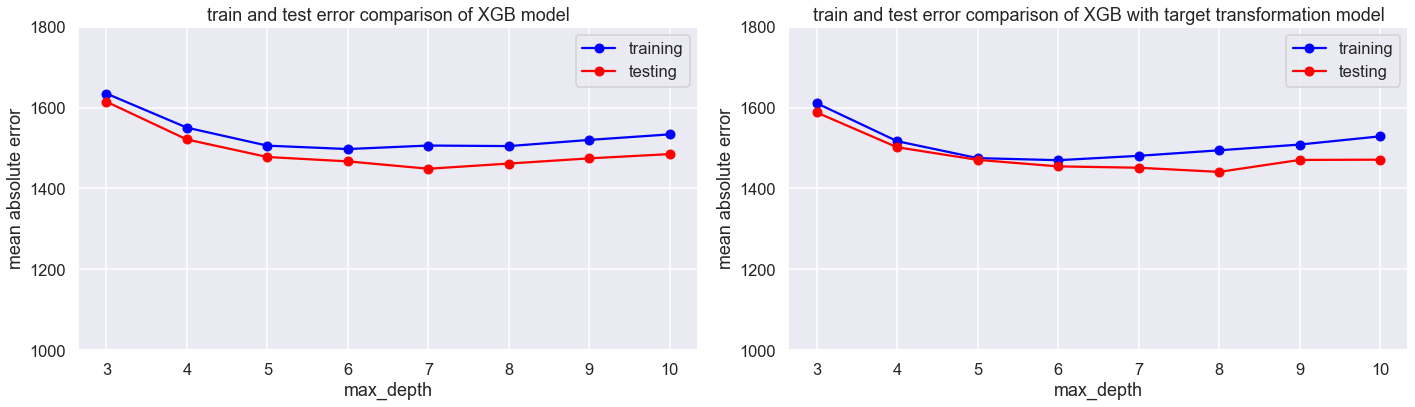

In [147]:
# compare two models
plt.figure(figsize=(20,6))

# XGB
plt.subplot(1,2,1)
plt.plot(np.arange(3,11,1).tolist(), CV_MAE_XGB, color='blue', marker='o', label='training')
plt.plot(np.arange(3,11,1).tolist(), test_MAE_XGB, color='red', marker='o', label='testing')
plt.xlabel("max_depth")
plt.ylabel("mean absolute error")
plt.yticks(np.arange(1000,1900,200).tolist())
plt.title("train and test error comparison of XGB model")
plt.legend()

# target transformed XGB
plt.subplot(1,2,2)
plt.plot(np.arange(3,11,1).tolist(), CV_MAE_XGB_T, color='blue', marker='o', label='training')
plt.plot(np.arange(3,11,1).tolist(), test_MAE_XGB_T, color='red', marker='o', label='testing')
plt.xlabel("max_depth")
plt.ylabel("mean absolute error")
plt.yticks(np.arange(1000,1900,200).tolist())
plt.title("train and test error comparison of XGB with target transformation model")
plt.legend()

plt.tight_layout()
plt.show()

For both models, test MAE are lower than the train MAE. The difference between the train and test MAE is very small. We can conclude that, both models are neither underfitting nor overfitting.
<br> For the XGB model, the lowest MAE occured at max_depth = 7
<br> For the target transformed XGB model, the lowest MAE occured at max_depth = 8

#### PCA: Principal Component Analysis to reduce the dimension of the features

In [102]:
# initialize pca with 95% feature variance
pca = PCA(n_components=0.95)

# apply PCA
pca_train = pca.fit_transform(train)

print(pca_train.shape)

# create train and test set
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(pca_train, target, test_size=0.2, random_state=42)

print('X_train :', pca_X_train.shape)
print('y_train :', pca_y_train.shape)
print('X_test :', pca_X_test.shape)
print('y_test :', pca_y_test.shape)

(10686, 16)
X_train : (8548, 16)
y_train : (8548, 1)
X_test : (2138, 16)
y_test : (2138, 1)


No of features before PCA and after applying variance threhold = 45
<br>No of features After PCA = 16 which contains 95% variance of the feature set
<br>No of features reduced = 45-16=29
<br>Dimensionality reduction = (29/45)*100 = 64.4%

In [94]:
pca_model_XGB_T = X_gradient_boosting_TT_regressor(pca_X_train, pca_y_train,
                                                   np.arange(3,11,1).tolist(), 
                                                   np.arange(100,501,100).tolist(), 
                                                   [0.1],
                                                   'neg_mean_absolute_error', 
                                                   10)

runtime =  10.6 mins


In [95]:
pca_cv_XGB_T, pca_y_pred_XGB_T, pca_MAE_XGB_T, pca_RMSE_XGB_T, pca_r2_XGB_T = model_output(pca_X_test, 
                                                                                           pca_y_test, 
                                                                                           pca_model_XGB_T)

best hyperparameters : {'TargetTransformed__regressor__learning_rate': 0.1, 'TargetTransformed__regressor__max_depth': 8, 'TargetTransformed__regressor__n_estimators': 200}


param_TargetTransformed__regressor__learning_rate  \
26                                               0.1   
27                                               0.1   
31                                               0.1   
25                                               0.1   
19                                               0.1   

   param_TargetTransformed__regressor__max_depth  \
26                                             8   
27                                             8   
31                                             9   
25                                             8   
19                                             6   

   param_TargetTransformed__regressor__n_estimators  split0_test_score  \
26                                              200       -1858.852537   
27                                              300       -1855.796621   
31                                              200       -1879.212929   
25                                              100       -1872.288429   
19                                              500       -1840.455577   

    split1_test_score  split2_test_score  split3_test_score  \
26       -1727.319870       -1632.051680       -1760.883703   
27       -1726.615752       -1637.983721       -1767.807935   
31       -1728.213973       -1621.914220       -1742.158783   
25       -1725.859745       -1626.733812       -1761.375217   
19       -1726.800542       -1655.947563       -1788.956112   

    split4_test_score  split5_test_score  split6_test_score  \
26       -1706.449814       -1663.391318       -1735.521938   
27       -1703.279496       -1674.224776       -1734.928528   
31       -1696.940915       -1697.685409       -1763.243472   
25       -1720.343251       -1662.244664       -1731.278382   
19       -1708.072617       -1679.604143       -1735.683229   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
26       -1570.186840       -1615.956192       -1796.686230     -1706.730012   
27       -1573.482142       -1611.731363       -1804.898748     -1709.074908   
31       -1589.578710       -1620.045428       -1767.381854     -1710.637570   
25       -1586.122679       -1641.932130       -1792.334672     -1712.051298   
19       -1573.021631       -1629.895522       -1794.487609     -1713.292454   

    std_test_score  rank_test_score  
26       83.521268                1  
27       83.245641                2  
31       81.729332                3  
25       81.066520                4  
19       77.623099                5

For the test set, MAE :  1643.09 RMSE :  2739.5 r2_score : 0.94


Runtime become double than the XGB model without PCA. But the model performance didn't imrpove. After implementing PCA on the dataset, the original features turned into Principal Components. Principal Components are the linear combination of the original features. Principal Components are not as readable and interpretable as original features. As my first goal is to find the important features, in this case PCA is not suitable to do that.

In [106]:
# let's create a new dataFrame with the actual and predicted prices
output = y_test.copy()

output['DT_predicted_price'] = y_pred_DT
output['RF_predicted_price'] = y_pred_RF
output['GB_predicted_price'] = y_pred_GB
output['XGB_predicted_price'] = y_pred_XGB
output['XGB_T_predicted_price'] = y_pred_XGB_T

# find the absolute error for the best two models
output['XGB_abs_err'] = np.abs(output['price']-output['XGB_predicted_price'])
output['XGB_T_abs_err'] = np.abs(output['price']-output['XGB_T_predicted_price'])

display(output.head())

price  DT_predicted_price  RF_predicted_price  GB_predicted_price  \
3504  20998            21915.84            20748.50            21810.96   
673   33998            34653.00            33999.50            35967.95   
6045  25990            22994.76            22308.67            25350.45   
6246  20000            18132.61            20027.00            18973.78   
1530  12290            12258.50            12296.33            10523.38   

      XGB_predicted_price  XGB_T_predicted_price  XGB_abs_err  XGB_T_abs_err  
3504         21681.460938           21704.800781   683.460938     706.800781  
673          35398.820312           35530.570312  1400.820312    1532.570312  
6045         26037.199219           24677.919922    47.199219    1312.080078  
6246         18898.960938           19166.960938  1101.039062     833.039062  
1530         10761.450195           10611.759766  1528.549805    1678.240234

#### How good is the XGB predictions?

In [107]:
# Let's check the summary statistics of the absolute errors of the best two models
output[['XGB_abs_err', 'XGB_T_abs_err']].describe()

XGB_abs_err  XGB_T_abs_err
count   2138.000000    2138.000000
mean    1452.071980    1454.382026
std     1836.293798    1808.928721
min        0.570312       0.480469
25%      424.672241     444.123047
50%      957.879395     996.750000
75%     1796.969727    1827.967773
max    30732.449219   31149.738281

25% of the predictions are within \\$0 to \\$445 lower or higher than the actual price
<br>50% of the predictions are within \\$0 to \\$997 lower or higher than the actual price
<br>75% of the predictions are within \\$0 to \\$1828 lower or higher than the actual price

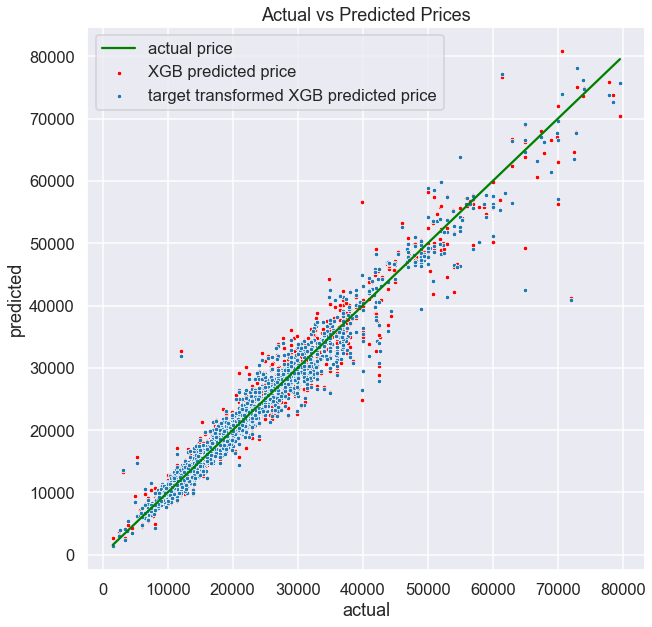

In [109]:
plt.figure(figsize=(10,10))

sns.lineplot(x='price', y='price', data=output, label='actual price', color='green')
sns.scatterplot(y='XGB_predicted_price', x='price', data=output, color='red', marker=".", label='XGB predicted price')
sns.scatterplot(y='XGB_T_predicted_price', x='price', data=output, marker=".", label='target transformed XGB predicted price')
plt.legend()
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title("Actual vs Predicted Prices")
plt.show()

- When Car price < \\$40,000, predicted prices are close to the actual prices. 
- When Car price > \\$40,000, predicted prices went away from the actual prices. 
That means Both XGB models perform better for the car price below \\$40,000

- XGB (red) predictions are far more away from the actual prices (actual price straight line). That means target transformed XGB is performing better than the XGB without target transformed model.

Based on the above plot, target transformation has improved the model performance

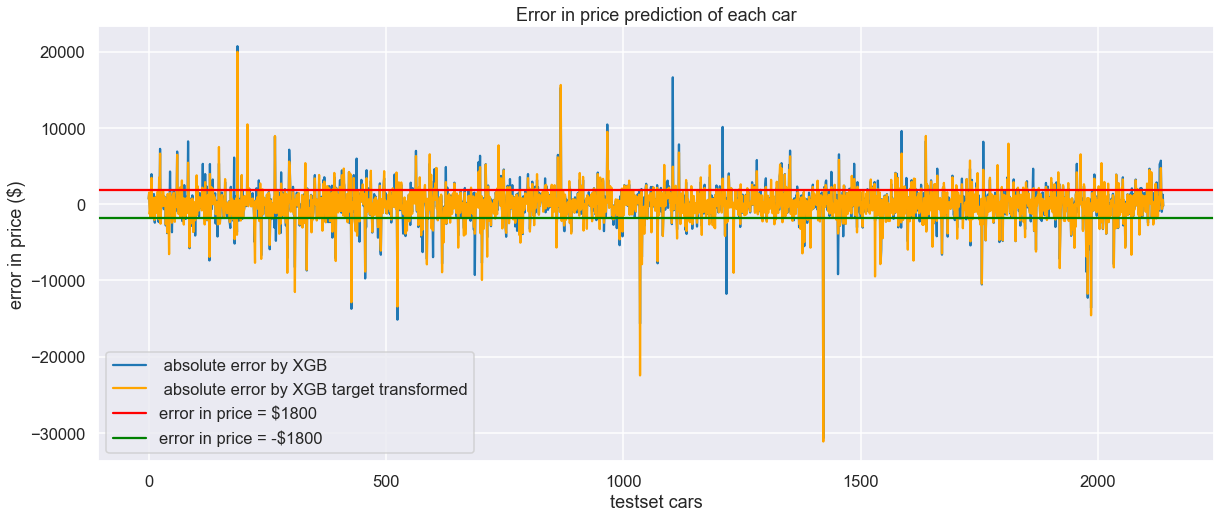

In [111]:
plt.figure(figsize=(20,8))

plt.plot([i for i in range(len(output))], output.XGB_predicted_price - output.price, 
         label=' absolute error by XGB')
plt.plot([i for i in range(len(output))], output.XGB_T_predicted_price - output.price, 
         color='orange', label=' absolute error by XGB target transformed')

plt.axhline(y=1800, color='r', linestyle='-', label = 'error in price = $1800')
plt.axhline(y=-1800, color='g', linestyle='-', label = 'error in price = -$1800')

plt.xlabel("testset cars")
plt.ylabel("error in price ($)")
plt.title("Error in price prediction of each car")

plt.legend()
plt.show()

- nealry 75% of error in car's price lie within the -\\$1800 (green staright line) to \\$1800 (red straight line)

negative error means predicted price is lower than the actual price, positive error means predicted price is greater than the actual price

#### Tree Diagram of the XGB model

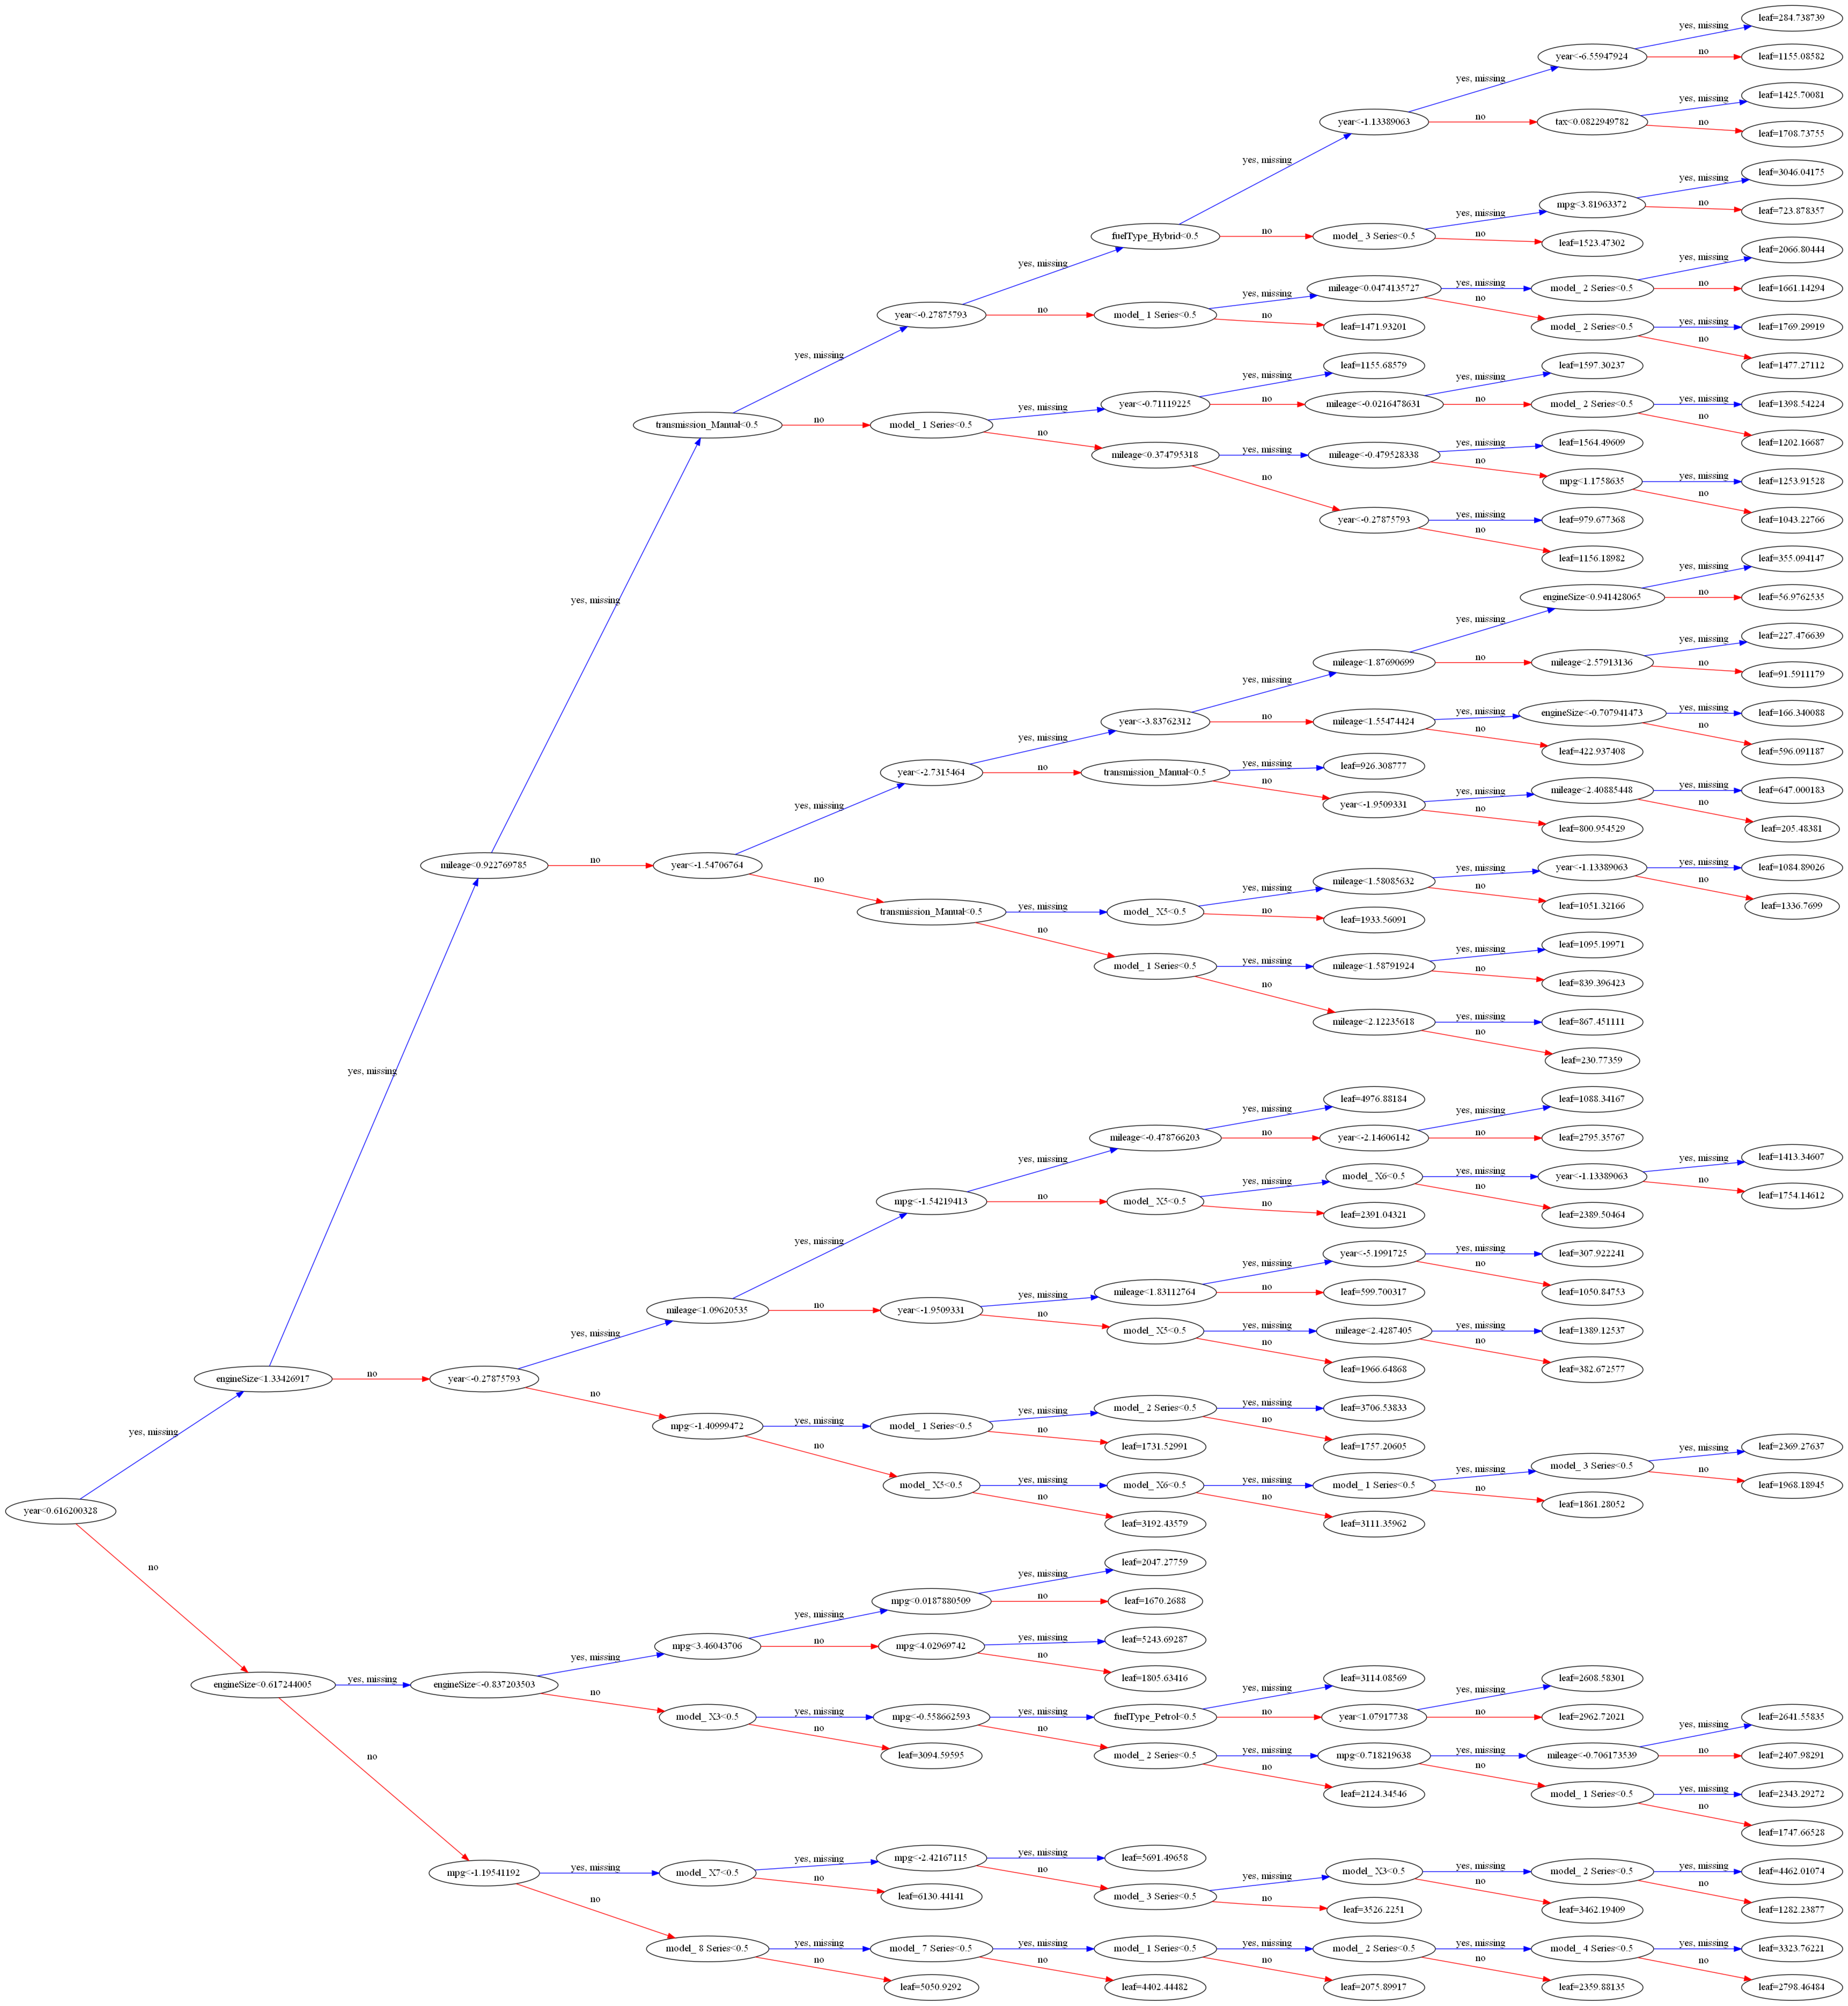

In [81]:
plot_tree(model_XGB.best_estimator_, num_trees=1, rankdir='LR')
plt.gcf().set_size_inches(100, 100)
plt.show()

Tree diagram is the best way to understand the ensemble models. The above tree of the XGB shows how a parent node of tree is growing from left to right based on different conditions set on the features. Finally, reached the leaf node and predicts the car price with the least Mean Absolute Error. Here, the tree has maximum depth of 8. 

#### Goal 1: Finding the best features

In [82]:
def feature_importance(model, x, regressor_algorithm):
    # find the important features
    importances = model.best_estimator_.feature_importances_

    # Sort importances
    sorted_index = np.argsort(importances)

    # Create labels
    labels = x.columns[sorted_index]

    # Create plot
    _ = plt.barh(range(x.shape[1]), importances[sorted_index], tick_label=labels)
    _ = plt.title("feature importance for " + regressor_algorithm)
    _ = plt.xlabel("feature importance")

    return _

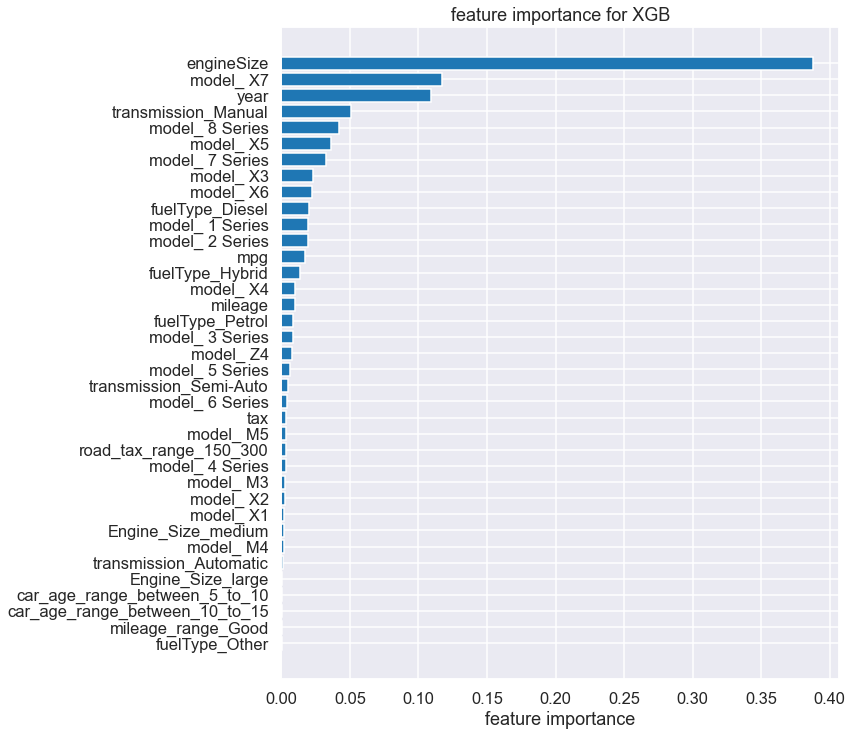

In [83]:
# feature importance for XGB
plt.figure(figsize=(10,12))
feature_importance(model_XGB, X_train, 'XGB')
plt.show()

As the first goal of this project is to **find the important features to predict the selling price of BMW used cars.**

Based on the XGB model, the important features are:
- **'engineSize'** has the highest feature importance to predict the price of a car. As far as we know, lower the engine size provides better mpg. From the correlation plot, 'engineSize' has the second highest positive correlation with the target variabel price.
- **'year'** is the second highest important feature, which is true. More latest the car, more expensive it is. From the correlation plot, **'year'** has the highest positive correlation with the target variabel price.
- **manual transmission** is an important feature. From the boxenplots, manual transmission cars are cheaper than automatic or semi-auto cars. From the actual vs predicted prices plot, the XGB models predicted quite well for the lower price cars.
- **model X7**, **8 Series** cars got high importance. These two car models have the highest mean price in the dataset.


#### Goal 2: Comparison of different Machine Learning Models

ML_models      MAE     RMSE  R squared
0       Linear Regression  2509.98  3617.76       0.90
1           Decision Tree  2022.34  3074.04       0.93
2           Random Forest  1823.28  2937.37       0.93
3       Gradient Boosting  1471.30  2396.71       0.96
4                     XGB  1452.07  2340.71       0.96
5  XGB_target_transformed  1454.38  2320.76       0.96

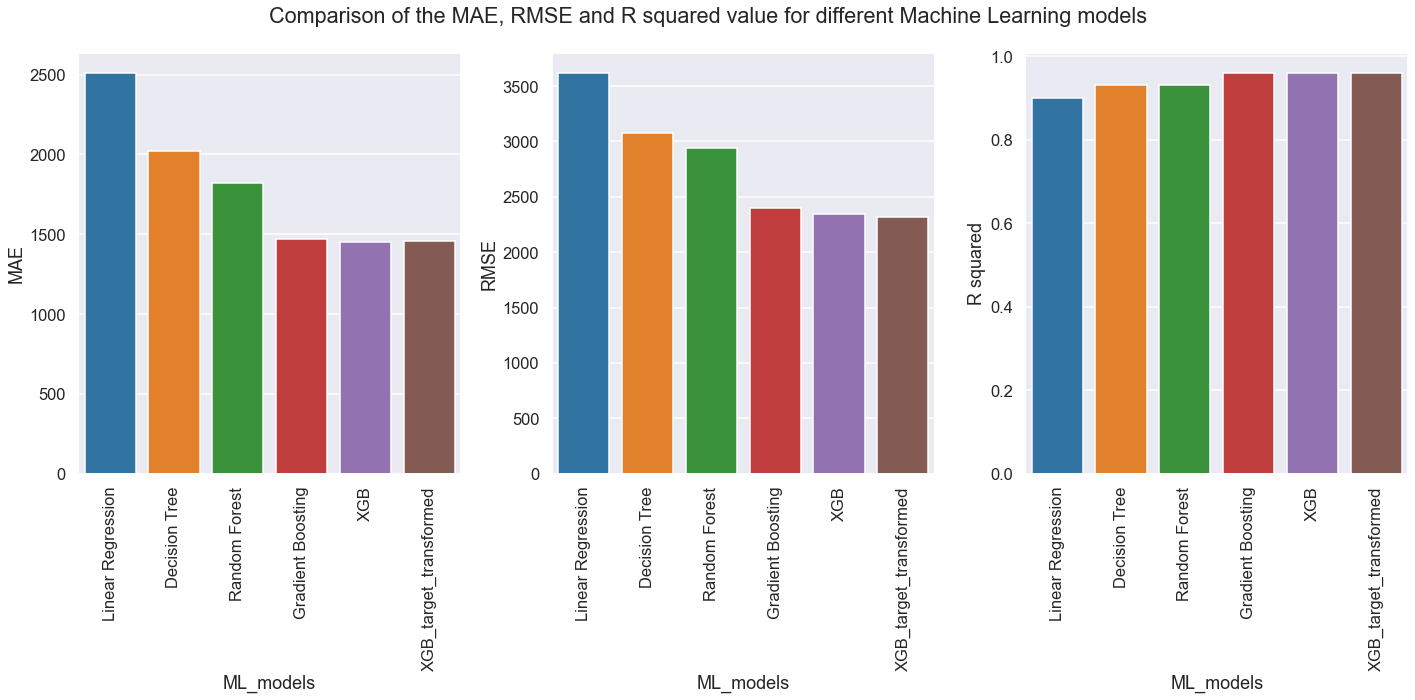

In [84]:
MAE = [MAE_LR, MAE_DT, MAE_RF, MAE_GB, MAE_XGB, MAE_XGB_T]
RMSE = [RMSE_LR, RMSE_DT, RMSE_RF, RMSE_GB, RMSE_XGB, RMSE_XGB_T]
r2 = [r2_LR, r2_DT, r2_RF, r2_GB, r2_XGB, r2_XGB_T]
ML_models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGB', 'XGB_target_transformed']

kpi_comparison = pd.DataFrame({"ML_models":ML_models, "MAE":MAE, "RMSE":RMSE, "R squared":r2})
kpi_comparison = kpi_comparison.round(2)
display(kpi_comparison)

plt.figure(figsize=(20,10))

for col in range(1, kpi_comparison.shape[1]):
    plt.subplot(1,3,col)
    sns.barplot(x = 'ML_models', y = kpi_comparison.columns[col], data=kpi_comparison)
    plt.xticks(rotation=90)

plt.suptitle("Comparison of the MAE, RMSE and R squared value for different Machine Learning models")
plt.tight_layout()
plt.show()

The second goal of this project is to **design a best supervised regression model to predict the selling price with lowest prediction error and compare different machine learning algorithm with different key performance indicators such as Mean Absolute Error (MAE), Root-mean squared error (RMSE) and coefficient of determination (R-squared).**

Finally, comapring 6 machine learning models with 3 different accuracy metrics, the best models are by rank:
1. XGB with target transformation (lowest MAE in test and cross-validation set (MAE very close to XGB without target transformation model for the test set), lowest RMSE, highest R squared)
2. XGB without target transformation (lowest MAE in test and cross-validation set, second lowest RMSE, highest R squared)
3. Gradient Boosting Regressor
4. Random Forest Regressor
5. Decision Tree Regressor
6. Linear Regression

In future, in order to make the prediction more accurate, I can suggest to add few new features in the dataset such as accident history, car's internal and exterior condition, car title, color, location etc.

